### Libraries

In [3]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import discogs_client
d = discogs_client.Client('ExampleApplication/0.1')

### Credentials

In [4]:
# Spotify Client Credentials
CLIENT_ID = "26c65df3e5844f1dbe355d82d80c9f6f"
CLIENT_SECRET = "2d4d2b147bc942b999564a5e8649b987"

In [5]:
# Discogs Client credentials

DISCOGS_TOKEN = "FbbkQDyGoGsJlnSqVfFwqfvUWnrtDcBiWmyHOHjX"

d = discogs_client.Client(
    'my_user_agent/1.0',
    consumer_key='hZZUdNwRHsUxlgReVdCA',
    consumer_secret='TUAxCaABSkDcmQgeRhIbRRvnHAopOIkH',
    token=u'FbbkQDyGoGsJlnSqVfFwqfvUWnrtDcBiWmyHOHjX',
    secret=u'my_token_secret'
)

In [4]:
d.get_authorize_url()

('FNiLSiAqShqUSyvFiLdvDKvvamHXRbdRjhnxswSY',
 'KtyoZkAukBASVIPVmzJnwYHyLkoJBSmwSmFhLrMx',
 'https://www.discogs.com/oauth/authorize?oauth_token=FNiLSiAqShqUSyvFiLdvDKvvamHXRbdRjhnxswSY')

In [6]:
d.get_access_token("LctzeTQBRJ")

('viOOFSQNUsSKkoSzFJNEmcNVmNhnJnKDAQvQekEG',
 'TPwetofdLfFVktggVcRdavQynfKdwFIZRuVGXGje')

In [19]:
me = d.identity()
print(me)

<User 2177455 'oliebab'>


In [48]:
# Print the attributes of a specific release
print(dir(d.release(1005543)))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_known_invalid_keys', 'artists', 'artists_sort', 'changes', 'client', 'community', 'companies', 'country', 'credits', 'data', 'data_quality', 'delete', 'fetch', 'formats', 'genres', 'id', 'images', 'labels', 'marketplace_stats', 'master', 'notes', 'previous_request', 'price_suggestions', 'refresh', 'save', 'status', 'styles', 'thumb', 'title', 'tracklist', 'url', 'videos', 'year']


In [52]:
print(d.release(6364852).artists[0].name, d.release(6364852).tracklist, type(d.release(6364852).artists))


cv313 [<Track 'A' 'Beyond Starlit Sky'>, <Track 'B' 'Beyond Starlit Sky (Live)'>] <class 'list'>


In [10]:
d.release(6364852).low

AttributeError: 'Release' object has no attribute 'low'

In [4]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))

In [64]:
results = d.search('Shed')
print(results.page(1))

[<Artist 97364 'Shed'>, <Master 337391 'Title Fight - Shed'>, <Release 2885498 'Title Fight - Shed'>, <Artist 227241 'Shed Seven'>, <Artist 2239437 'Shed (8)'>, <Release 21635851 'Title Fight - Shed'>, <Label 652123 'Shed (3)'>, <Release 6531212 'Title Fight - Shed'>, <Artist 1054026 'Shed (5)'>, <Release 6076582 'Title Fight - Shed'>, <Artist 366398 'Bog-Shed'>, <Release 4502376 'Title Fight - Shed'>, <Release 4609701 'Title Fight - Shed'>, <Release 3295864 'Title Fight - Shed'>, <Release 5193670 'Title Fight - Shed'>, <Master 143200 'D_Note* - Shed My Skin'>, <Label 308875 'The Shed'>, <Label 9561 'Burning Shed'>, <Label 264023 'The Music Shed'>, <Label 303616 'Shed Studios'>, <Release 7687770 'Title Fight - Shed'>, <Master 1110872 'Title Fight - Shed'>, <Label 200205 'Shed (2)'>, <Master 13221 'Zyklon-B - Blood Must Be Shed'>, <Master 241416 'England (2) - Garden Shed'>, <Release 4564545 'Title Fight - Shed'>, <Label 282106 'White Shed Publishing'>, <Release 50688 "Nutmeg - Oscar's 

In [70]:
label = d.label(6170)
print(label)

<Label 6170 'Tempa'>


In [ ]:
#If URL contains /master
master_release = d.master(1005543)
print('master_release', master_release)

master_release <Master 1005543 'Beyond Starlit Sky'>


In [ ]:
# Release infos

discogs_id = 6364852

release = d.release(discogs_id)
title = release.title
artists = release.artists
genres = release.genres
images = release.images
community_details = release.community
tracklist = release.tracklist
formats  = release.formats



print(release)
print(release.title)

print(artists)
print(release.tracklist)
print(release.formats)


# COmmunity 


print(community_details)
print("Community Rating : ", community_details.rating)
print("Want : ", community_details.want)
print("Have : ", community_details.have)

print(release.id)
print(release.fetch('id'))
print(release.fetch('community')['rating'])


<Release 6364852 'Beyond Starlit Sky'>
Beyond Starlit Sky
[<Artist 820353 'cv313'>]
[<Track 'A' 'Beyond Starlit Sky'>, <Track 'B' 'Beyond Starlit Sky (Live)'>]
[{'name': 'Vinyl', 'qty': '1', 'descriptions': ['12"', '33 ⅓ RPM', 'Limited Edition'], 'text': 'Clear'}]
<CommunityDetails want/have: 249/238>
Community Rating :  <Rating avg: 4.88>
Want :  249
Have :  238
6364852
6364852
{'count': 65, 'average': 4.88}


In [10]:
import discogs_client
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import re
from typing import Dict, List, Tuple

class AlbumAnalyzer:
    def __init__(self, spotify_client_id: str, spotify_client_secret: str, discogs_token: str):
        """Initialize the analyzer with API credentials."""
        # Initialize Spotify client
        self.spotify = spotipy.Spotify(
            client_credentials_manager=SpotifyClientCredentials(
                client_id=CLIENT_ID,
                client_secret=CLIENT_SECRET
            )
        )
        
        # Initialize Discogs client
        self.discogs = discogs_client.Client(
            'AlbumAnalyzer/1.0',
            user_token=DISCOGS_TOKEN
        )
    
    def parse_discogs_url(self, url: str) -> Tuple[str, int]:
        """Parse Discogs URL to determine if it's a master or release and get the ID."""
        master_pattern = r'/master/(\d+)'
        release_pattern = r'/release/(\d+)'
        
        master_match = re.search(master_pattern, url)
        if master_match:
            return 'master', int(master_match.group(1))
            
        release_match = re.search(release_pattern, url)
        if release_match:
            return 'release', int(release_match.group(1))
            
        raise ValueError("Invalid Discogs URL format")
    
    def get_release_info(self, url: str) -> Tuple[str, str, List[str]]:
        """Get artist and album name from Discogs."""
        release_type, release_id = self.parse_discogs_url(url)
        
        try:
            if release_type == 'master':
                master = self.discogs.master(release_id)
                release = master.main_release
            else:
                release = self.discogs.release(release_id)
            
            # Extract artist name safely
            artist_name = release.artists[0].name if release.artists else "Unknown Artist"
            # Clean up artist name (remove any numbering or special characters)
            artist_name = re.sub(r'\(\d+\)', '', artist_name).strip()
            
            # Get album name
            album_name = release.title
            
            # Get track titles, filtering out empty or None values
            track_titles = [track.title for track in release.tracklist 
                          if track.title and isinstance(track.title, str)]
            
            return artist_name, album_name, track_titles
            
        except Exception as e:
            raise Exception(f"Failed to fetch Discogs release: {str(e)}")
    
    def get_spotify_album(self, artist_name: str, album_name: str) -> str:
        """Search for album on Spotify and return its ID."""
        query = f"album:{album_name} artist:{artist_name}"
        results = self.spotify.search(q=query, type='album', limit=1)
        
        if not results['albums']['items']:
            raise ValueError(f"Album '{album_name}' by {artist_name} not found on Spotify")
            
        return results['albums']['items'][0]['id']
    
    def get_album_tracks_features(self, album_id: str) -> pd.DataFrame:
        """Get audio features for all tracks in an album."""
        # Get all tracks from album
        tracks = self.spotify.album_tracks(album_id)['items']
        track_ids = [track['id'] for track in tracks]
        
        # Get audio features for all tracks
        audio_features = self.spotify.audio_features(track_ids)
        
        # Create DataFrame with track names and audio features
        df = pd.DataFrame([{
            'track_name': track['name'],
            **features
        } for track, features in zip(tracks, audio_features) if features is not None])
        
        # Select only the features we want to analyze
        features_to_keep = [
            'track_name', 'danceability', 'energy', 'loudness',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo'
        ]
        
        return df[features_to_keep]
    
    def analyze_album(self, discogs_url: str) -> Dict:
        """Main analysis function."""
        # Get release info from Discogs
        artist_name, album_name, track_titles = self.get_release_info(discogs_url)
        
        print(f"Found album: {album_name} by {artist_name}")
        print(f"Number of tracks: {len(track_titles)}")
        
        # Find album on Spotify
        try:
            album_id = self.get_spotify_album(artist_name, album_name)
            print("Found album on Spotify")
        except ValueError as e:
            print(f"Error: {e}")
            return None
        
        # Get audio features
        try:
            features_df = self.get_album_tracks_features(album_id)
            print("Successfully retrieved audio features")
        except Exception as e:
            print(f"Error getting audio features: {e}")
            return None
        
        # Calculate basic statistics, excluding 'track_name' column
        numeric_features = features_df.select_dtypes(include=['float64', 'int64']).columns
        
        album_stats = {
            'artist': artist_name,
            'album': album_name,
            'track_count': len(features_df),
            'mean_features': features_df[numeric_features].mean().to_dict(),
            'std_features': features_df[numeric_features].std().to_dict(),
            'track_features': features_df.to_dict('records')
        }
        
        return album_stats

# Example usage
if __name__ == "__main__":
    analyzer = AlbumAnalyzer(
        spotify_client_id=CLIENT_ID,
        spotify_client_secret=CLIENT_SECRET,
        discogs_token=DISCOGS_TOKEN
    )
    
    url = "https://www.discogs.com/master/1005543-cv313-Beyond-Starlit-Sky"
    
    # Analyze album
    analysis = analyzer.analyze_album(url)
    
    if analysis:
        print(f"\nAnalyzing {analysis['album']} by {analysis['artist']}")
        print("\nMean Audio Features:")
        for feature, value in analysis['mean_features'].items():
            print(f"{feature}: {value:.3f}")

Found album: Beyond Starlit Sky by cv313
Number of tracks: 2
Found album on Spotify
Successfully retrieved audio features

Analyzing Beyond Starlit Sky by cv313

Mean Audio Features:
danceability: 0.512
energy: 0.655
loudness: -16.693
speechiness: 0.041
acousticness: 0.030
instrumentalness: 0.592
liveness: 0.204
valence: 0.323
tempo: 121.076


Found album: Beyond Starlit Sky by cv313
Number of tracks: 2
Found album on Spotify
Successfully retrieved audio features


C:\Users\olivi\AppData\Local\Temp\ipykernel_1936\134757867.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(features, rotation=45)


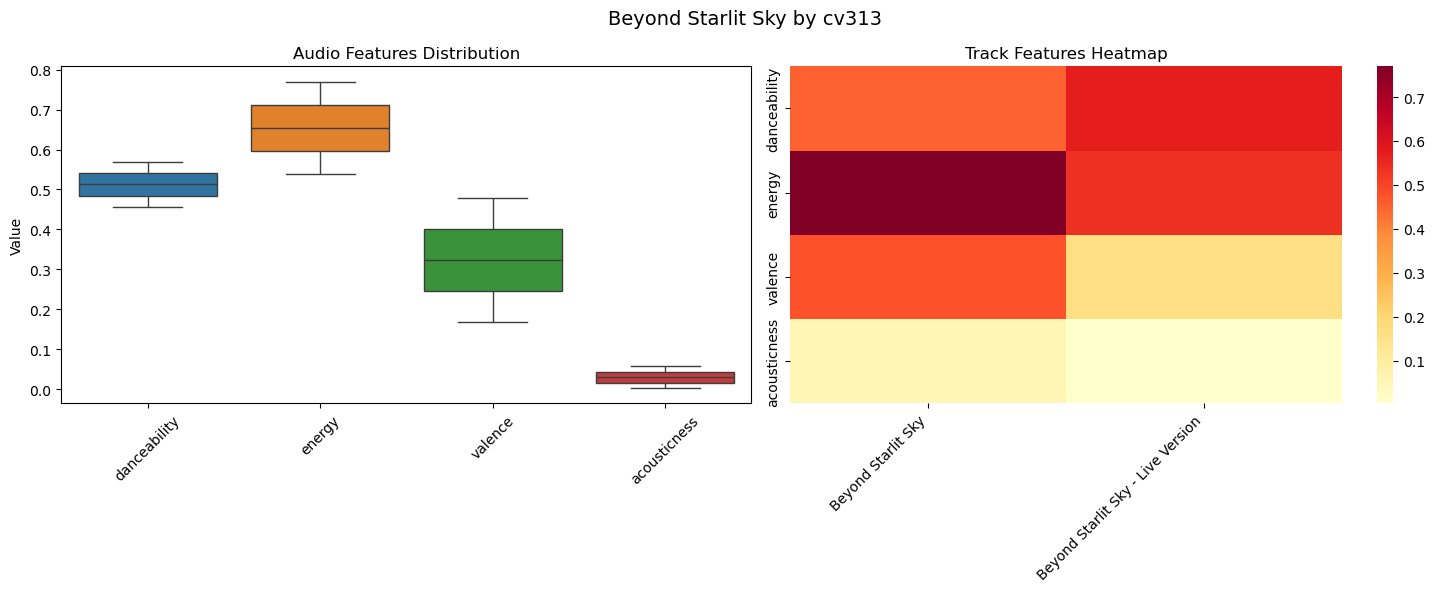

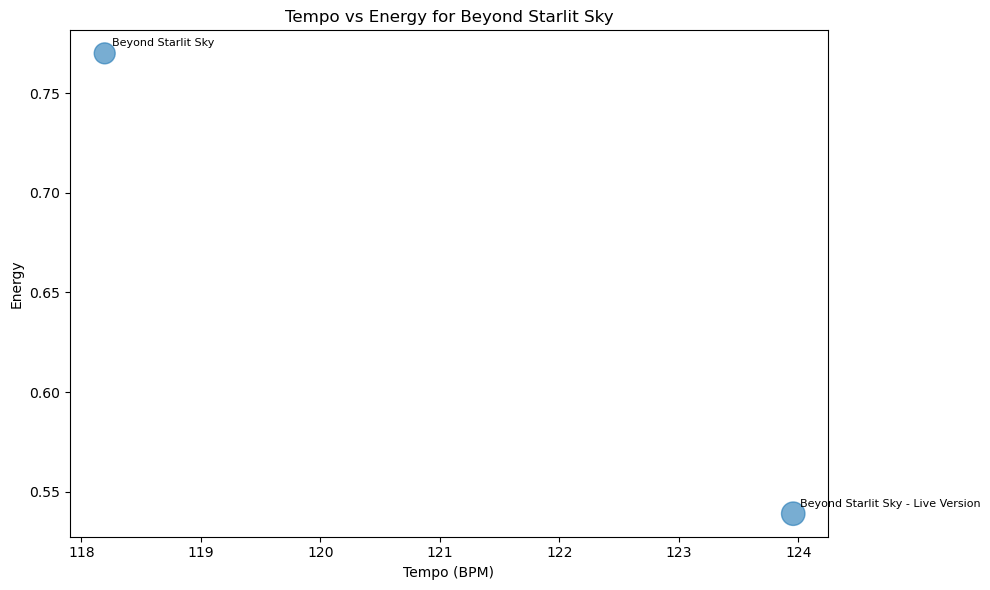

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


def plot_album_features(analysis):
    """Create visualizations for album audio features."""
    # Convert track features to DataFrame
    features_df = pd.DataFrame(analysis['track_features'])
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f"{analysis['album']} by {analysis['artist']}", fontsize=14)
    
    # Features to visualize
    features = ['danceability', 'energy', 'valence', 'acousticness']
    
    # 1. Feature distributions (left plot)
    sns.boxplot(data=features_df[features], ax=ax1)
    ax1.set_title('Audio Features Distribution')
    ax1.set_xticklabels(features, rotation=45)
    ax1.set_ylabel('Value')
    
    # 2. Track heatmap (right plot)
    sns.heatmap(features_df[features].T, 
                cmap='YlOrRd',
                ax=ax2,
                xticklabels=features_df['track_name'],
                yticklabels=features)
    ax2.set_title('Track Features Heatmap')
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout
    plt.tight_layout()
    return fig

def plot_tempo_vs_energy(analysis):
    """Create a scatter plot of tempo vs energy."""
    # Convert track features to DataFrame
    features_df = pd.DataFrame(analysis['track_features'])
    
    # Create scatter plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    scatter = ax.scatter(features_df['tempo'],
                        features_df['energy'],
                        s=features_df['danceability']*500,
                        alpha=0.6)
    
    # Add track names as labels
    for _, row in features_df.iterrows():
        ax.annotate(row['track_name'],
                   (row['tempo'], row['energy']),
                   xytext=(5, 5),
                   textcoords='offset points',
                   fontsize=8)
    
    ax.set_xlabel('Tempo (BPM)')
    ax.set_ylabel('Energy')
    ax.set_title(f"Tempo vs Energy for {analysis['album']}")
    
    plt.tight_layout()
    return fig

# Example usage
if __name__ == "__main__":
    
    # Create analyzer instance
    analyzer = AlbumAnalyzer(
        spotify_client_id=CLIENT_ID,
        spotify_client_secret=CLIENT_SECRET,
        discogs_token=DISCOGS_TOKEN
    )
    
    # Analyze album
    url = "https://www.discogs.com/master/1005543-cv313-Beyond-Starlit-Sky"
    analysis = analyzer.analyze_album(url)
    
    if analysis:
        # Create and display visualizations
        fig1 = plot_album_features(analysis)
        fig2 = plot_tempo_vs_energy(analysis)
        plt.show()

Found album: Beyond Starlit Sky by cv313
Number of tracks: 2
Found album on Spotify
Successfully retrieved audio features


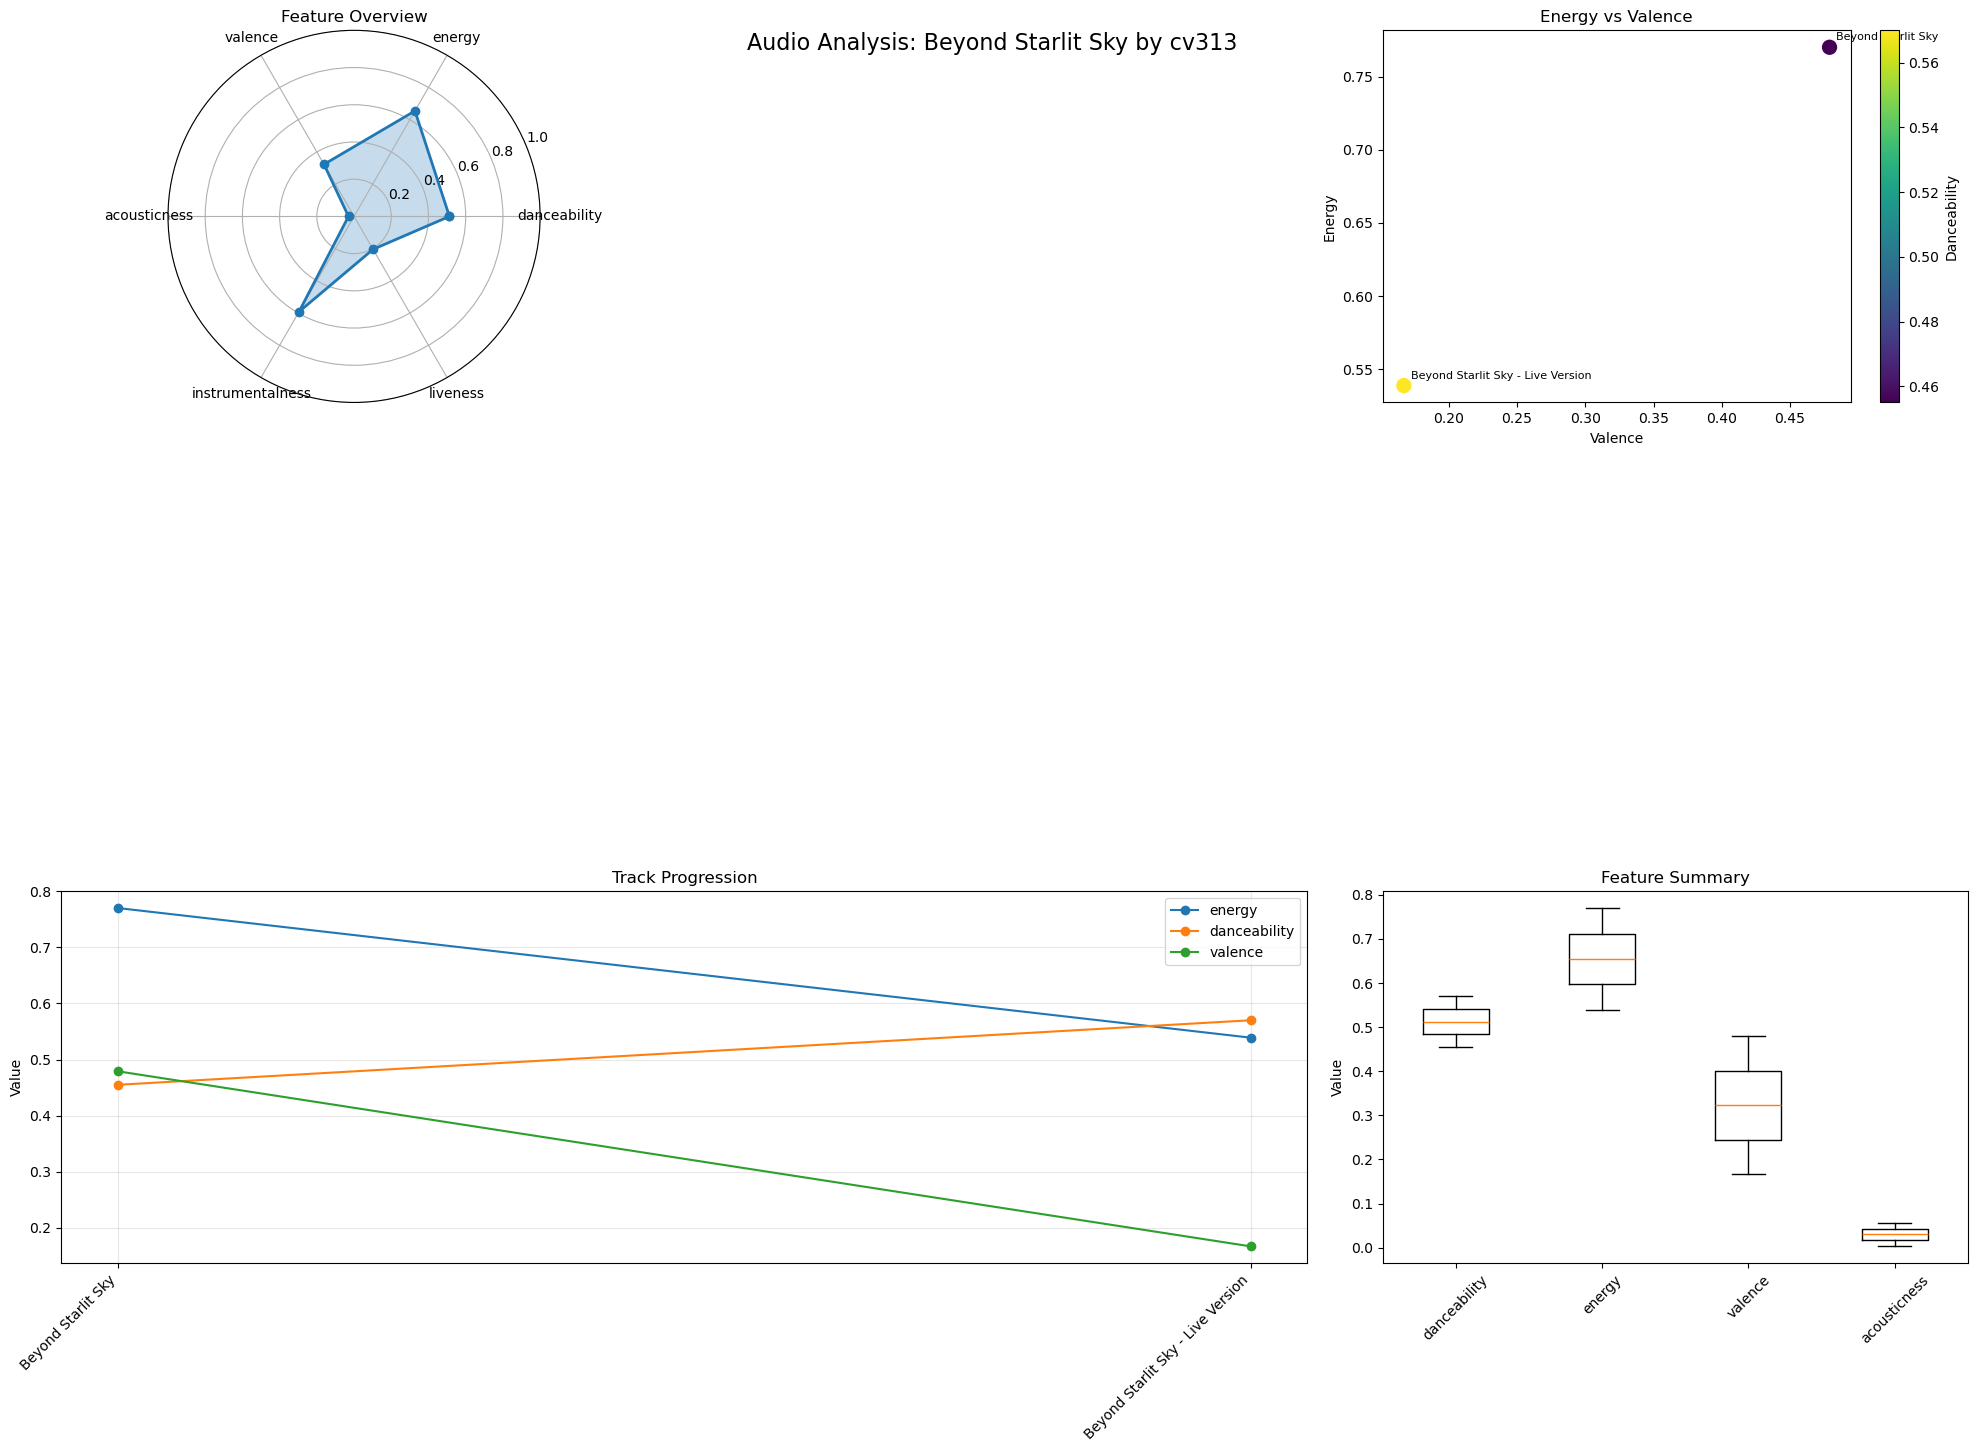

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

def create_advanced_visualizations(analysis):
    """Create a comprehensive set of advanced visualizations for album analysis."""
    # Convert track features to DataFrame
    features_df = pd.DataFrame(analysis['track_features'])
    
    # Use a default matplotlib style instead of seaborn
    plt.style.use('default')
    
    # Create main figure
    fig = plt.figure(figsize=(20, 15))
    
    # Create GridSpec for layout
    gs = GridSpec(3, 3, figure=fig)
    
    # 1. Spider/Radar Plot (top left)
    ax_radar = fig.add_subplot(gs[0, 0], projection='polar')
    create_spider_plot(features_df, ax_radar)
    
   
    
    # 3. Energy-Valence Plot (top right)
    ax_quad = fig.add_subplot(gs[0, 2])
    create_energy_valence_plot(features_df, ax_quad)
    
   
    
    # 5. Track Progression (bottom left and middle)
    ax_prog = fig.add_subplot(gs[2, 0:2])
    create_track_progression(features_df, ax_prog)
    
    # 6. Feature Summary (bottom right)
    ax_summary = fig.add_subplot(gs[2, 2])
    create_feature_summary(features_df, ax_summary)
    
    # Set title and adjust layout
    fig.suptitle(f"Audio Analysis: {analysis['album']} by {analysis['artist']}", 
                fontsize=16, y=0.95)
    plt.tight_layout()
    return fig

def create_spider_plot(df, ax):
    """Create spider/radar plot with feature averages."""
    features = ['danceability', 'energy', 'valence', 
                'acousticness', 'instrumentalness', 'liveness']
    
    means = [df[feat].mean() for feat in features]
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    
    # Close the plot
    means = np.concatenate((means, [means[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    
    # Plot data
    ax.plot(angles, means, 'o-', linewidth=2)
    ax.fill(angles, means, alpha=0.25)
    
    # Set thetha locations and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    
    # Set limits and title
    ax.set_ylim(0, 1)
    ax.set_title('Feature Overview')

def create_energy_valence_plot(df, ax):
    """Create energy-valence scatter plot."""
    scatter = ax.scatter(df['valence'], df['energy'], 
                        c=df['danceability'], cmap='viridis',
                        s=100)
    
    ax.set_xlabel('Valence')
    ax.set_ylabel('Energy')
    ax.set_title('Energy vs Valence')
    plt.colorbar(scatter, ax=ax, label='Danceability')
    
    # Add track labels
    for idx, row in df.iterrows():
        ax.annotate(row['track_name'],
                   (row['valence'], row['energy']),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=8)

def create_track_progression(df, ax):
    """Create track progression plot."""
    features = ['energy', 'danceability', 'valence']
    
    for feature in features:
        ax.plot(range(len(df)), df[feature], 
                marker='o', label=feature)
    
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df['track_name'], rotation=45, ha='right')
    ax.set_ylabel('Value')
    ax.set_title('Track Progression')
    ax.legend()
    ax.grid(True, alpha=0.3)

def create_feature_summary(df, ax):
    """Create box plots for feature summary."""
    features = ['danceability', 'energy', 'valence', 'acousticness']
    
    ax.boxplot([df[feature] for feature in features], labels=features)
    ax.set_xticklabels(features, rotation=45)
    ax.set_ylabel('Value')
    ax.set_title('Feature Summary')

# Example usage
if __name__ == "__main__":
    
    analyzer = AlbumAnalyzer(
        spotify_client_id=CLIENT_ID,
        spotify_client_secret=CLIENT_SECRET,
        discogs_token=DISCOGS_TOKEN
    )
    url = "https://www.discogs.com/master/1005543-cv313-Beyond-Starlit-Sky"
    analysis = analyzer.analyze_album(url)
    
    if analysis:
        fig = create_advanced_visualizations(analysis)
        plt.show()

Found album: Beyond Starlit Sky by cv313
Number of tracks: 2
Found album on Spotify
Successfully retrieved audio features

Analyzing album: Beyond Starlit Sky by cv313

Top Recommendations:
                       track_title              artist_name                       release_title duration  similarity_score
    Deathwish - Razorblade Version             FragileChild        Feuertaufe (Special Edition)    05:53             0.645
                          Sinister                     ШОВИ                   The Ring Style II    00:27             0.630
                Scène 5: Chrysalis Polymorphik Skyzophrenia                              ACTE 8    04:34             0.610
                            Ground               Conculator                        Syntheleptic    01:41             0.597
                         Mitotiani                   Xbiram                              Azteca    03:39             0.593
                             Boxes                   Piksel             

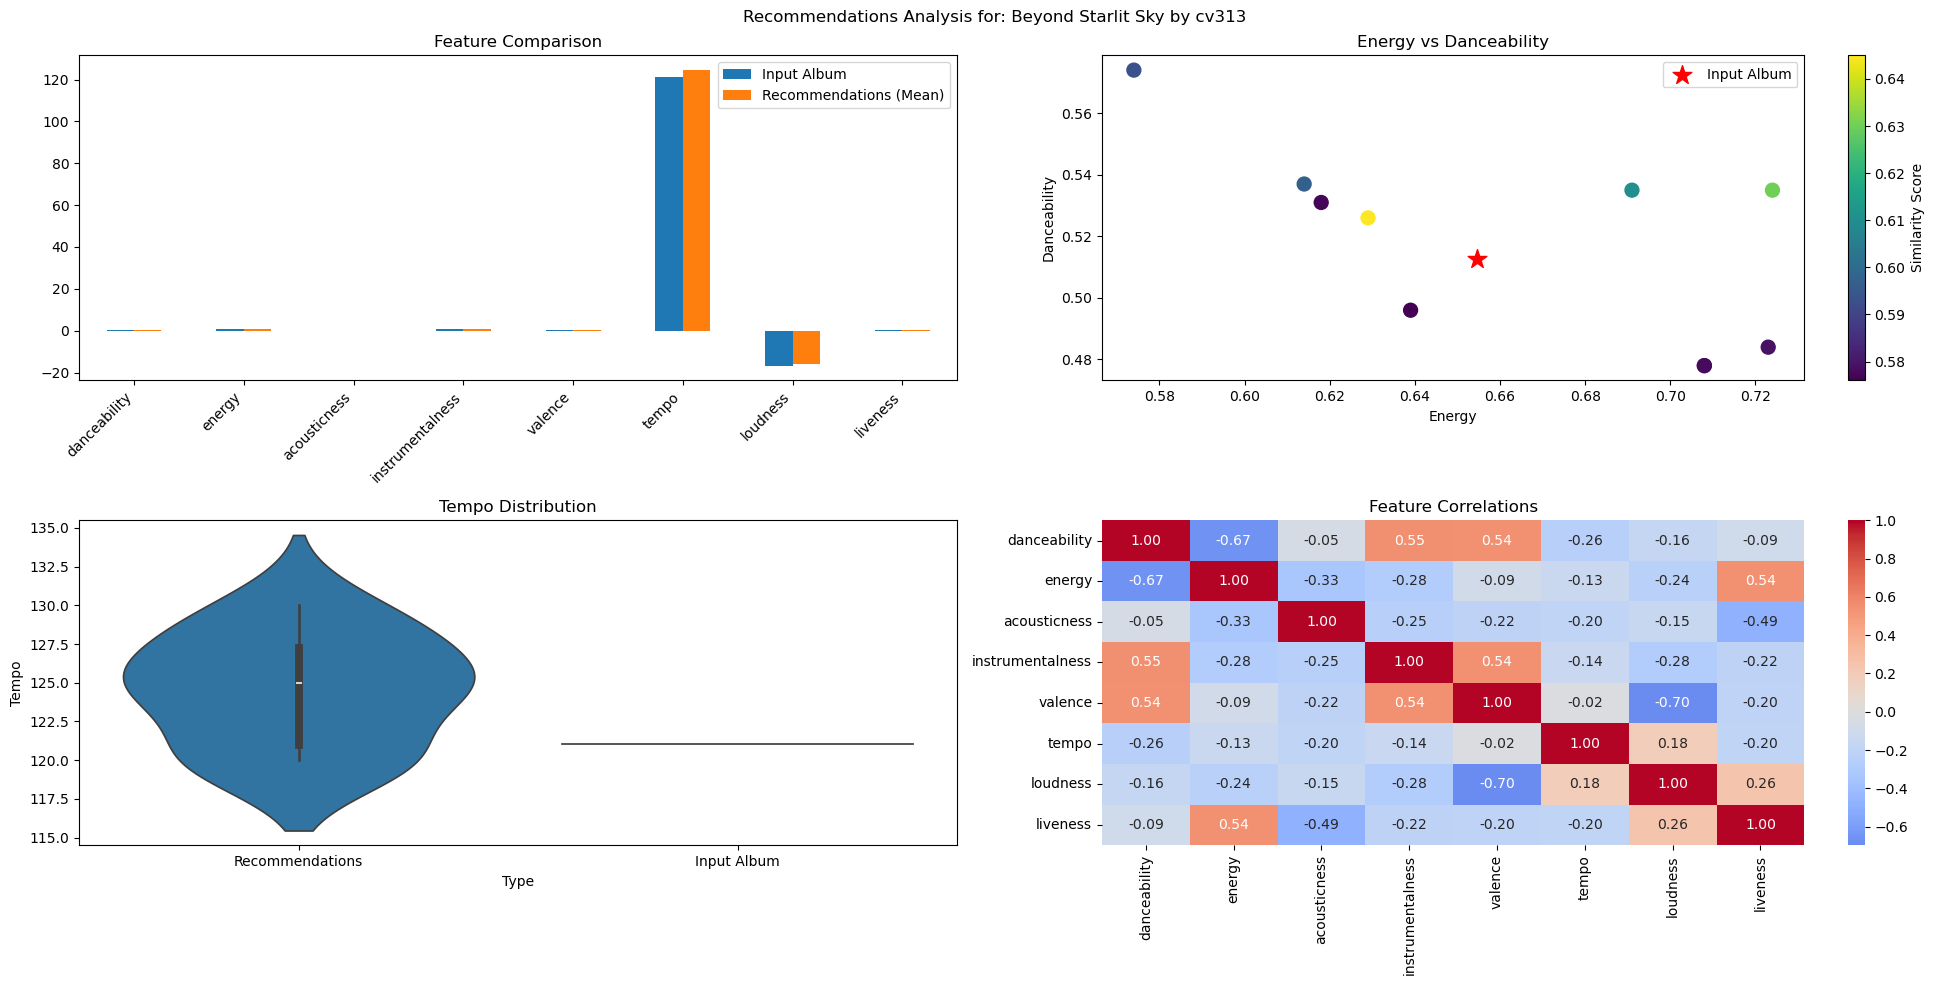

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

class TrackRecommender:
    def __init__(self, spotify_data_path: str):
        """Initialize the recommender with data source."""
        # Load Spotify dataset
        self.spotify_df = pd.read_csv(spotify_data_path)
        
        # Define features to use for similarity
        self.audio_features = [
            'danceability', 'energy', 'acousticness',
            'instrumentalness', 'valence', 'tempo',
            'loudness', 'liveness'
        ]
        
        # Additional information columns
        self.info_columns = [
            'track_title', 'artist_name', 'release_title',
            'release_date', 'label_name', 'duration_ms'
        ]
        
        # Initialize scaler
        self.scaler = StandardScaler()
    
    def compute_album_profile(self, analysis: dict) -> np.ndarray:
        """Compute average audio feature profile for the input album."""
        album_df = pd.DataFrame(analysis['track_features'])
        profile = album_df[self.audio_features].mean()
        return profile
    
    def find_similar_tracks(self, album_profile: pd.Series, n_recommendations: int = 10, 
                          min_tempo_diff: float = 15.0) -> pd.DataFrame:
        """Find tracks with similar audio features."""
        # Scale the features
        scaled_features = self.scaler.fit_transform(
            self.spotify_df[self.audio_features]
        )
        
        # Scale the album profile
        scaled_profile = self.scaler.transform(
            album_profile.values.reshape(1, -1)
        )
        
        # Calculate distances
        distances = euclidean_distances(scaled_features, scaled_profile)
        self.spotify_df['similarity_score'] = 1 / (1 + distances)
        
        # Filter by tempo difference
        tempo_diff = abs(self.spotify_df['tempo'] - album_profile['tempo'])
        filtered_df = self.spotify_df[tempo_diff <= min_tempo_diff].copy()
        
        # Sort by similarity and get top recommendations
        recommendations = (filtered_df.sort_values('similarity_score', ascending=False)
                         .head(n_recommendations))
        
        # Convert duration from ms to minutes:seconds
        recommendations['duration'] = pd.to_datetime(recommendations['duration_ms'], 
                                                   unit='ms').dt.strftime('%M:%S')
        
        return recommendations
    
    def get_recommendations(self, analysis: dict, n_recommendations: int = 10) -> tuple:
        """Get track recommendations based on album analysis."""
        # Compute album profile
        album_profile = self.compute_album_profile(analysis)
        
        # Find similar tracks
        recommendations = self.find_similar_tracks(
            album_profile,
            n_recommendations=n_recommendations
        )
        
        # Prepare results with all relevant information
        results_columns = (self.info_columns + 
                         ['similarity_score', 'duration'] + 
                         self.audio_features)
        
        results = recommendations[results_columns].copy()
        
        # Round similarity score and numeric features
        results['similarity_score'] = results['similarity_score'].round(3)
        for feature in self.audio_features:
            if feature in results.columns:
                results[feature] = results[feature].round(3)
        
        return results, album_profile
    
    def visualize_recommendations(self, recommendations: pd.DataFrame, 
                                album_profile: pd.Series,
                                analysis: dict):
        """Visualize recommendations compared to input album."""
        fig = plt.figure(figsize=(20, 10))
        gs = plt.GridSpec(2, 2)
        
        # 1. Feature comparison plot (top left)
        ax1 = fig.add_subplot(gs[0, 0])
        feature_comparison = pd.DataFrame({
            'Input Album': album_profile,
            'Recommendations (Mean)': recommendations[self.audio_features].mean()
        }, index=self.audio_features)
        
        feature_comparison.plot(kind='bar', ax=ax1)
        ax1.set_title('Feature Comparison')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
        
        # 2. Energy vs Danceability (top right)
        ax2 = fig.add_subplot(gs[0, 1])
        scatter = ax2.scatter(
            recommendations['energy'],
            recommendations['danceability'],
            c=recommendations['similarity_score'],
            cmap='viridis',
            s=100
        )
        
        # Add input album point
        ax2.scatter(
            album_profile['energy'],
            album_profile['danceability'],
            color='red',
            s=200,
            marker='*',
            label='Input Album'
        )
        
        ax2.set_xlabel('Energy')
        ax2.set_ylabel('Danceability')
        ax2.set_title('Energy vs Danceability')
        plt.colorbar(scatter, ax=ax2, label='Similarity Score')
        ax2.legend()
        
        # 3. Tempo distribution (bottom left)
        ax3 = fig.add_subplot(gs[1, 0])
        tempo_data = pd.DataFrame({
            'Tempo': recommendations['tempo'],
            'Type': 'Recommendations'
        })
        tempo_data = pd.concat([
            tempo_data,
            pd.DataFrame({
                'Tempo': [album_profile['tempo']],
                'Type': 'Input Album'
            })
        ])
        sns.violinplot(data=tempo_data, x='Type', y='Tempo', ax=ax3)
        ax3.set_title('Tempo Distribution')
        
        # 4. Feature heatmap (bottom right)
        ax4 = fig.add_subplot(gs[1, 1])
        sns.heatmap(recommendations[self.audio_features].corr(), 
                   cmap='coolwarm', center=0, annot=True, fmt='.2f', ax=ax4)
        ax4.set_title('Feature Correlations')
        
        plt.suptitle(f"Recommendations Analysis for: {analysis['album']} by {analysis['artist']}")
        plt.tight_layout()
        return fig

# Example usage
if __name__ == "__main__":

    
    # Initialize components
    analyzer = AlbumAnalyzer(
        spotify_client_id=CLIENT_ID,
        spotify_client_secret=CLIENT_SECRET,
        discogs_token=DISCOGS_TOKEN
    )
    
    recommender = TrackRecommender('complete/spotify_complete_data.csv')
    
    url = "https://www.discogs.com/master/1005543-cv313-Beyond-Starlit-Sky"
    analysis = analyzer.analyze_album(url)
    
    if analysis:
        recommendations, album_profile = recommender.get_recommendations(analysis)
        
        print("\nAnalyzing album:", analysis['album'], "by", analysis['artist'])
        print("\nTop Recommendations:")
        display_cols = ['track_title', 'artist_name', 'release_title', 
                       'duration', 'similarity_score']
        print(recommendations[display_cols].to_string(index=False))
        
        fig = recommender.visualize_recommendations(recommendations, album_profile, analysis)
        plt.show()

Loaded 7523890 tracks from dataset
Found album: Beyond Starlit Sky by cv313
Number of tracks: 2
Found album on Spotify
Successfully retrieved audio features
Discogs genres: ['electronic', 'tech house']
Normalized genre groups: {'electronica', 'house'}
Found 370221 tracks in similar genres

Analyzing album: Beyond Starlit Sky by cv313

Top Recommendations:
                     track_title           artist_name                         label_name                       release_title duration  similarity_score
                       Mitotiani                Xbiram                     iM Electronica                              Azteca    03:39             0.544
       I Feel You - Original Mix              Lincwell       Big Mamas House Compilations House Culture 2015 (Deluxe Version)    04:18             0.524
Metro Spin - JB Chill House Edit       Johan Brunkvist                    Johan Brunkvist         Mixed House Groove Volume 4    05:01             0.510
                      Chill Bi

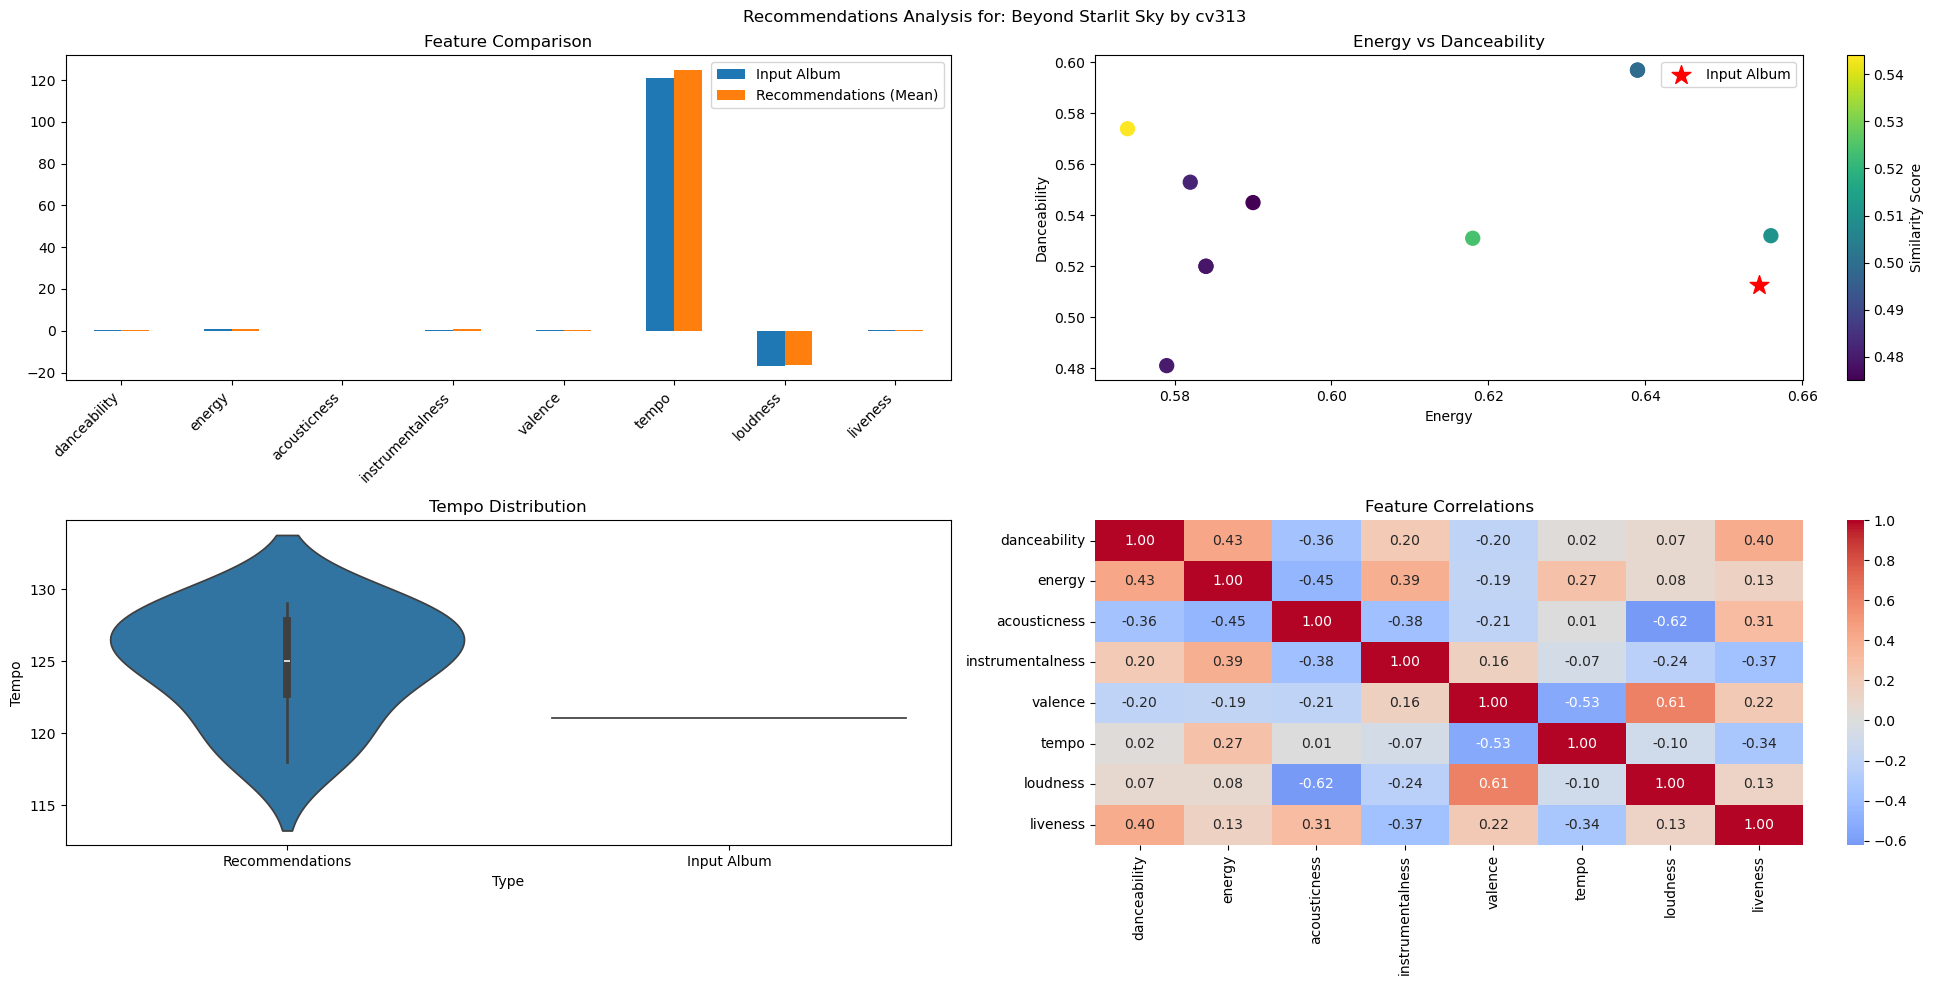

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Set, Dict
import re

class GenreMatchingRecommender:
    def __init__(self, spotify_data_path: str):
        """Initialize the recommender with data source."""
        # Load Spotify dataset
        self.spotify_df = pd.read_csv(spotify_data_path)
        
        # Define features to use for similarity
        self.audio_features = [
            'danceability', 'energy', 'acousticness',
            'instrumentalness', 'valence', 'tempo',
            'loudness', 'liveness'
        ]
        
        # Additional information columns
        self.info_columns = [
            'track_title', 'artist_name', 'release_title',
            'release_date', 'label_name', 'duration_ms'
        ]
        
        # Initialize scaler
        self.scaler = StandardScaler()
        
        # Create genre mappings
        self._create_genre_mappings()
        
        print(f"Loaded {len(self.spotify_df)} tracks from dataset")
    
    def _create_genre_mappings(self):
        """Create mappings of related genres and subgenres."""
        self.genre_groups = {
            'techno': {'techno', 'minimal', 'industrial', 'acid', 'raw', 'deep', 'hypnotic', 'detroit'},
            'house': {'house', 'deep house', 'tech house', 'minimal', 'microhouse', 'acid'},
            'trance': {'trance', 'progressive', 'psy', 'goa', 'uplifting', 'tech trance'},
            'ambient': {'ambient', 'atmospheric', 'downtempo', 'experimental', 'dub', 'abstract'},
            'drum_and_bass': {'drum and bass', 'dnb', 'jungle', 'atmospheric', 'liquid'},
            'electronica': {'electronic', 'idm', 'experimental', 'glitch', 'abstract'},
            'dub_techno': {'dub techno', 'detroit', 'minimal', 'deep', 'hypnotic'}
        }
        
        # Create reverse mapping for genre matching
        self.genre_to_group = {}
        for group, genres in self.genre_groups.items():
            for genre in genres:
                self.genre_to_group[genre] = group
    
    def _extract_discogs_id(self, url: str) -> str:
        """Extract Discogs ID from URL."""
        try:
            # Try to extract ID using regex
            match = re.search(r'/(\d+)(?:-|$)', url)
            if match:
                return match.group(1)
            raise ValueError("Could not extract Discogs ID from URL")
        except Exception as e:
            print(f"Error extracting Discogs ID: {str(e)}")
            raise
    
    def get_discogs_release_genres(self, discogs_release) -> List[str]:
        """Get genre information from Discogs release."""
        genres = []
        try:
            if hasattr(discogs_release, 'genres'):
                genres.extend([str(g) for g in discogs_release.genres if g is not None])
            if hasattr(discogs_release, 'styles'):
                genres.extend([str(s) for s in discogs_release.styles if s is not None])
        except Exception as e:
            print(f"Error getting Discogs genres: {str(e)}")
        return [g.lower() for g in genres if isinstance(g, str)]
    
    def normalize_genres(self, genres: List[str]) -> Set[str]:
        """Normalize genre names and find matching genre groups."""
        normalized_genres = set()
        
        for genre in genres:
            # Skip non-string values
            if not isinstance(genre, str):
                continue
                
            genre = str(genre).lower().strip()
            if not genre:  # Skip empty strings
                continue
                
            # Check direct matches in genre groups
            for group, related_genres in self.genre_groups.items():
                if genre in related_genres:
                    normalized_genres.add(group)
                # Check for partial matches
                elif any(keyword in genre for keyword in related_genres):
                    normalized_genres.add(group)
        
        return normalized_genres
    
    def get_recommendations(self, analysis: dict, spotify, discogs_client, url: str, 
                          n_recommendations: int = 10) -> tuple:
        """Get track recommendations based on album analysis."""
        try:
            # Extract Discogs ID and get release information
            discogs_id = self._extract_discogs_id(url)
            discogs_genres = []
            
            try:
                # Try to get release first
                discogs_release = discogs_client.release(discogs_id)
                discogs_genres = self.get_discogs_release_genres(discogs_release)
            except Exception as e:
                print(f"Error getting release: {str(e)}")
                try:
                    # If release fails, try master release
                    discogs_master = discogs_client.master(discogs_id)
                    discogs_genres = self.get_discogs_release_genres(discogs_master)
                except Exception as e:
                    print(f"Error getting master: {str(e)}")
                    print("Could not fetch Discogs genres")
            
            print("Discogs genres:", discogs_genres)
            
            # Ensure genres are strings
            discogs_genres = [str(g) for g in discogs_genres if g is not None]
            
            # Normalize genres
            normalized_genres = self.normalize_genres(discogs_genres)
            print("Normalized genre groups:", normalized_genres)
            
            # Compute album profile
            album_df = pd.DataFrame(analysis['track_features'])
            album_profile = album_df[self.audio_features].mean()
            
            # Find similar tracks with genre matching
            recommendations = self.find_similar_tracks(
                album_profile,
                normalized_genres,
                n_recommendations=n_recommendations
            )
            
            # Prepare results
            results_columns = (self.info_columns + 
                            ['similarity_score', 'duration'] + 
                            self.audio_features)
            
            results = recommendations[results_columns].copy()
            
            # Round similarity score and numeric features
            results['similarity_score'] = results['similarity_score'].round(3)
            for feature in self.audio_features:
                if feature in results.columns:
                    results[feature] = results[feature].round(3)
            
            return results, album_profile
            
        except Exception as e:
            print(f"Error getting recommendations: {str(e)}")
            import traceback
            traceback.print_exc()
            return None, None
    
    def find_similar_tracks(self, album_profile: pd.Series, genre_groups: Set[str],
                          n_recommendations: int = 10, min_tempo_diff: float = 15.0) -> pd.DataFrame:
        """Find tracks with similar audio features and matching genre."""
        try:
            # Add genre groups to DataFrame temporarily
            self.spotify_df['genre_groups'] = self.spotify_df.apply(
                lambda x: self.normalize_genres([
                    str(x['track_title']),
                    str(x['artist_name']),
                    str(x['label_name'])
                ]),
                axis=1
            )
            
            # Filter tracks by matching genre groups
            if genre_groups:
                genre_mask = self.spotify_df['genre_groups'].apply(
                    lambda x: bool(x & genre_groups)  # Check for any overlapping genres
                )
                filtered_df = self.spotify_df[genre_mask].copy()
                print(f"Found {len(filtered_df)} tracks in similar genres")
            else:
                filtered_df = self.spotify_df.copy()
                print("No specific genre detected, using all tracks")
            
            if len(filtered_df) == 0:
                print("No tracks found with matching genres, using all tracks")
                filtered_df = self.spotify_df.copy()
            
            # Scale the features
            scaled_features = self.scaler.fit_transform(
                filtered_df[self.audio_features]
            )
            
            # Scale the album profile
            scaled_profile = self.scaler.transform(
                album_profile.values.reshape(1, -1)
            )
            
            # Calculate distances
            distances = euclidean_distances(scaled_features, scaled_profile)
            filtered_df['similarity_score'] = 1 / (1 + distances)
            
            # Filter by tempo difference
            tempo_diff = abs(filtered_df['tempo'] - album_profile['tempo'])
            tempo_filtered_df = filtered_df[tempo_diff <= min_tempo_diff].copy()
            
            if len(tempo_filtered_df) < n_recommendations:
                print("Not enough tracks within tempo range, using all tempo matches")
                tempo_filtered_df = filtered_df.copy()
            
            # Sort by similarity and get top recommendations
            recommendations = (tempo_filtered_df.sort_values('similarity_score', ascending=False)
                             .head(n_recommendations))
            
            # Convert duration from ms to minutes:seconds
            recommendations['duration'] = pd.to_datetime(recommendations['duration_ms'], 
                                                       unit='ms').dt.strftime('%M:%S')
            
            # Clean up
            recommendations = recommendations.drop('genre_groups', axis=1)
            
            return recommendations
            
        except Exception as e:
            print(f"Error finding similar tracks: {str(e)}")
            import traceback
            traceback.print_exc()
            return pd.DataFrame()
    
    def visualize_recommendations(self, recommendations: pd.DataFrame, 
                                album_profile: pd.Series,
                                analysis: dict):
        """Visualize recommendations compared to input album."""
        try:
            fig = plt.figure(figsize=(20, 10))
            gs = plt.GridSpec(2, 2)
            
            # 1. Feature comparison plot (top left)
            ax1 = fig.add_subplot(gs[0, 0])
            feature_comparison = pd.DataFrame({
                'Input Album': album_profile,
                'Recommendations (Mean)': recommendations[self.audio_features].mean()
            }, index=self.audio_features)
            
            feature_comparison.plot(kind='bar', ax=ax1)
            ax1.set_title('Feature Comparison')
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
            
            # 2. Energy vs Danceability (top right)
            ax2 = fig.add_subplot(gs[0, 1])
            scatter = ax2.scatter(
                recommendations['energy'],
                recommendations['danceability'],
                c=recommendations['similarity_score'],
                cmap='viridis',
                s=100
            )
            
            # Add input album point
            ax2.scatter(
                album_profile['energy'],
                album_profile['danceability'],
                color='red',
                s=200,
                marker='*',
                label='Input Album'
            )
            
            ax2.set_xlabel('Energy')
            ax2.set_ylabel('Danceability')
            ax2.set_title('Energy vs Danceability')
            plt.colorbar(scatter, ax=ax2, label='Similarity Score')
            ax2.legend()
            
            # 3. Tempo distribution (bottom left)
            ax3 = fig.add_subplot(gs[1, 0])
            tempo_data = pd.DataFrame({
                'Tempo': recommendations['tempo'],
                'Type': 'Recommendations'
            })
            tempo_data = pd.concat([
                tempo_data,
                pd.DataFrame({
                    'Tempo': [album_profile['tempo']],
                    'Type': 'Input Album'
                })
            ])
            sns.violinplot(data=tempo_data, x='Type', y='Tempo', ax=ax3)
            ax3.set_title('Tempo Distribution')
            
            # 4. Feature heatmap (bottom right)
            ax4 = fig.add_subplot(gs[1, 1])
            sns.heatmap(recommendations[self.audio_features].corr(), 
                       cmap='coolwarm', center=0, annot=True, fmt='.2f', ax=ax4)
            ax4.set_title('Feature Correlations')
            
            plt.suptitle(f"Recommendations Analysis for: {analysis['album']} by {analysis['artist']}")
            plt.tight_layout()
            return fig
            
        except Exception as e:
            print(f"Error creating visualizations: {str(e)}")
            import traceback
            traceback.print_exc()
            return None

# Example usage
if __name__ == "__main__":
       
    # Initialize analyzer
    analyzer = AlbumAnalyzer(
        spotify_client_id=CLIENT_ID,
        spotify_client_secret=CLIENT_SECRET,
        discogs_token=DISCOGS_TOKEN
    )
    
    # Initialize recommender
    recommender = GenreMatchingRecommender('complete/spotify_complete_data.csv')
    
    # Test with a sample album
    url = "https://www.discogs.com/master/1005543-cv313-Beyond-Starlit-Sky"
    analysis = analyzer.analyze_album(url)
    
    if analysis:
        # Get recommendations
        recommendations, album_profile = recommender.get_recommendations(
            analysis,
            analyzer.spotify,
            analyzer.discogs,
            url
        )
        
        if recommendations is not None and not recommendations.empty:
            print("\nAnalyzing album:", analysis['album'], "by", analysis['artist'])
            print("\nTop Recommendations:")
            display_cols = ['track_title', 'artist_name', 'label_name', 
                          'release_title', 'duration', 'similarity_score']
            print(recommendations[display_cols].to_string(index=False))
            
            fig = recommender.visualize_recommendations(recommendations, album_profile, analysis)
            if fig is not None:
                plt.show()
        else:
            print("No recommendations found.")

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Set, Dict, Tuple, Optional
import re
import traceback

class GenreMatchingRecommender:
    def __init__(self, spotify_data_path: str):
        """Initialize the recommender with data source."""
        try:
            self.spotify_df = pd.read_csv(spotify_data_path)
            print(f"Loaded {len(self.spotify_df)} tracks from dataset")
        except Exception as e:
            print(f"Error loading dataset: {str(e)}")
            raise
        
        # Define features for similarity calculation
        self.audio_features = [
            'danceability', 'energy', 'acousticness',
            'instrumentalness', 'valence', 'tempo',
            'loudness', 'liveness'
        ]
        
        # Define information columns
        self.info_columns = [
            'track_title', 'artist_name', 'release_title',
            'release_date', 'label_name', 'duration_ms'
        ]
        
        # Initialize scaler
        self.scaler = StandardScaler()
        
        # Create genre mappings
        self._create_genre_mappings()
    
    def _create_genre_mappings(self):
        """Create comprehensive mappings of related genres and subgenres."""
        self.genre_groups = {
            'techno': {
                'techno', 'minimal techno', 'industrial techno', 'acid techno', 
                'raw techno', 'deep techno', 'hypnotic techno', 'detroit techno',
                'hard techno', 'experimental techno', 'tech house', 'minimal',
                'dark techno', 'warehouse techno', 'peak time techno', 'modular techno'
            },
            'dub_techno': {
                'dub techno', 'detroit', 'minimal dub', 'deep dub', 'hypnotic dub',
                'atmospheric dub', 'dubbed out', 'echo dub', 'berlin dub techno',
                'basic channel style', 'deepchord style', 'ambient dub'
            },
            'ambient': {
                'ambient', 'atmospheric', 'downtempo', 'experimental ambient',
                'dark ambient', 'space ambient', 'drone', 'soundscape', 
                'field recording', 'generative', 'environmental', 'isolationist',
                'ambient dub', 'ambient techno', 'space music', 'organic ambient',
                'modern classical ambient', 'arctic ambient'
            },
            'drone': {
                'drone', 'dark drone', 'ambient drone', 'noise drone', 
                'experimental drone', 'minimal drone', 'atmospheric drone',
                'industrial drone', 'guitar drone', 'electronic drone',
                'deep drone', 'drone ambient'
            },
            'experimental': {
                'experimental', 'avant-garde', 'glitch', 'idm', 'abstract',
                'noise', 'microsound', 'sound art', 'musique concrète',
                'electroacoustic', 'generative', 'algorithmic', 'granular',
                'minimal experimental', 'abstract beats', 'sound collage'
            },
            'minimal': {
                'minimal', 'microhouse', 'minimal house', 'minimal techno',
                'minimal dub', 'clicks and cuts', 'minimal experimental',
                'minimal ambient', 'minimal electronic', 'reductionist',
                'minimal dub techno'
            },
            'industrial': {
                'industrial', 'power electronics', 'noise', 'dark ambient',
                'rhythmic noise', 'industrial techno', 'industrial ambient',
                'dark industrial', 'experimental industrial'
            },
            'glitch': {
                'glitch', 'microsound', 'clicks and cuts', 'glitch ambient',
                'glitch techno', 'glitch electronic', 'digital minimalism',
                'abstract digital', 'computer music', 'granular synthesis'
            }
        }
        
        # Create reverse mapping for genre matching
        self.genre_to_group = {}
        for group, genres in self.genre_groups.items():
            for genre in genres:
                self.genre_to_group[genre] = group
    
    def _extract_discogs_id(self, url: str) -> str:
        """Extract Discogs ID from URL."""
        try:
            match = re.search(r'/(?:release|master)/(\d+)(?:-|$)', url)
            if match:
                return match.group(1)
            raise ValueError("Could not extract Discogs ID from URL")
        except Exception as e:
            print(f"Error extracting Discogs ID: {str(e)}")
            raise
    
    def get_discogs_release_styles(self, discogs_release, is_master: bool = False) -> List[str]:
        """Get styles from Discogs release."""
        styles = []
        try:
            if is_master:
                if hasattr(discogs_release, 'styles') and discogs_release.styles:
                    styles = discogs_release.styles
                    print(f"Found master styles: {styles}")
            else:
                if hasattr(discogs_release, 'styles') and discogs_release.styles:
                    styles = discogs_release.styles
                    print(f"Found release styles: {styles}")
                elif hasattr(discogs_release, 'master') and discogs_release.master:
                    master = discogs_release.master()
                    if hasattr(master, 'styles') and master.styles:
                        styles = master.styles
                        print(f"Found styles from master: {styles}")
        except Exception as e:
            print(f"Error getting Discogs styles: {str(e)}")
            traceback.print_exc()
            
        return [str(s).lower() for s in styles if s is not None]
    
    def normalize_genres(self, genres: List[str]) -> Set[str]:
        """Normalize genre names and find matching genre groups with improved matching."""
        normalized_genres = set()
        
        for genre in genres:
            if not isinstance(genre, str):
                continue
                
            genre = str(genre).lower().strip()
            if not genre:
                continue
            
            # Direct matches
            for group, related_genres in self.genre_groups.items():
                if genre in related_genres:
                    normalized_genres.add(group)
                    continue
            
            # Partial matches with word boundaries
            genre_words = set(genre.split())
            for group, related_genres in self.genre_groups.items():
                for related_genre in related_genres:
                    related_words = set(related_genre.split())
                    if genre_words & related_words:
                        normalized_genres.add(group)
                        break
            
            # Handle compound genres
            if 'ambient' in genre and 'dub' in genre and 'techno' in genre:
                normalized_genres.add('dub_techno')
                normalized_genres.add('ambient')
            elif 'dub' in genre and 'techno' in genre:
                normalized_genres.add('dub_techno')
            elif 'ambient' in genre and 'techno' in genre:
                normalized_genres.add('ambient')
                normalized_genres.add('techno')
        
        return normalized_genres
    
    def get_recommendations(self, analysis: dict, spotify, discogs_client, url: str, 
                          n_recommendations: int = 10) -> Tuple[Optional[pd.DataFrame], Optional[pd.Series]]:
        """Get track recommendations based on album analysis."""
        try:
            # Extract Discogs ID and determine if it's a master release
            discogs_id = self._extract_discogs_id(url)
            is_master = 'master' in url.lower()
            
            # Fetch styles based on release type
            try:
                if is_master:
                    print("Processing master release...")
                    master = discogs_client.master(discogs_id)
                    discogs_styles = self.get_discogs_release_styles(master, is_master=True)
                else:
                    print("Processing release...")
                    release = discogs_client.release(discogs_id)
                    discogs_styles = self.get_discogs_release_styles(release, is_master=False)
                
                print("Discogs styles:", discogs_styles)
                
                # Normalize styles
                normalized_genres = self.normalize_genres(discogs_styles)
                print("Normalized genre groups:", normalized_genres)
                
                # Compute album profile
                album_df = pd.DataFrame(analysis['track_features'])
                album_profile = album_df[self.audio_features].mean()
                
                # Initialize recommendations DataFrame
                recommendations = pd.DataFrame()
                seen_tracks = set()
                total_needed = n_recommendations
                
                while len(recommendations) < total_needed:
                    # Get batch of recommendations
                    batch = self.find_similar_tracks(
                        album_profile,
                        normalized_genres,
                        n_recommendations=total_needed * 2
                    )
                    
                    # Filter for unique tracks
                    for _, row in batch.iterrows():
                        track_title = str(row['track_title']).lower().strip()
                        if track_title not in seen_tracks:
                            seen_tracks.add(track_title)
                            recommendations = pd.concat([recommendations, row.to_frame().T])
                            if len(recommendations) >= total_needed:
                                break
                    
                    # Break if we can't find any more unique tracks
                    if len(batch) == 0 or len(recommendations) >= total_needed:
                        break
                
                # Prepare final results
                if not recommendations.empty:
                    results_columns = (self.info_columns + 
                                    ['similarity_score', 'duration'] + 
                                    self.audio_features)
                    
                    results = recommendations[results_columns].copy()
                    
                    # Round numeric values
                    results['similarity_score'] = results['similarity_score'].round(3)
                    for feature in self.audio_features:
                        if feature in results.columns:
                            results[feature] = results[feature].round(3)
                    
                    # Final sort by similarity score
                    results = results.sort_values('similarity_score', ascending=False).head(n_recommendations)
                    
                    return results, album_profile
                
                return None, None
                
            except Exception as e:
                print(f"Error in recommendation process: {str(e)}")
                traceback.print_exc()
                return None, None
                
        except Exception as e:
            print(f"Error getting recommendations: {str(e)}")
            traceback.print_exc()
            return None, None
    
    def find_similar_tracks(self, album_profile: pd.Series, genre_groups: Set[str],
                          n_recommendations: int = 10, min_tempo_diff: float = 15.0) -> pd.DataFrame:
        """Find tracks with similar audio features and matching genre."""
        try:
            # Add genre groups to DataFrame temporarily
            self.spotify_df['genre_groups'] = self.spotify_df.apply(
                lambda x: self.normalize_genres([
                    str(x['track_title']),
                    str(x['artist_name']),
                    str(x['label_name'])
                ]),
                axis=1
            )
            
            # Filter by matching genre groups
            if genre_groups:
                genre_mask = self.spotify_df['genre_groups'].apply(
                    lambda x: bool(x & genre_groups)
                )
                filtered_df = self.spotify_df[genre_mask].copy()
                print(f"Found {len(filtered_df)} tracks in similar genres")
            else:
                filtered_df = self.spotify_df.copy()
                print("No specific genre detected, using all tracks")
            
            if len(filtered_df) == 0:
                print("No tracks found with matching genres, using all tracks")
                filtered_df = self.spotify_df.copy()
            
            # Create unique identifier for tracks
            filtered_df['track_key'] = filtered_df['track_title'].str.lower().str.strip()
            
            # Remove duplicates based on track title only
            filtered_df = filtered_df.drop_duplicates(subset=['track_key'], keep='first')
            filtered_df = filtered_df.drop('track_key', axis=1)
            
            # Scale features
            scaled_features = self.scaler.fit_transform(
                filtered_df[self.audio_features]
            )
            
            scaled_profile = self.scaler.transform(
                album_profile.values.reshape(1, -1)
            )
            
            # Calculate similarities
            distances = euclidean_distances(scaled_features, scaled_profile)
            filtered_df['similarity_score'] = 1 / (1 + distances)
            
            # Filter by tempo
            tempo_diff = abs(filtered_df['tempo'] - album_profile['tempo'])
            tempo_filtered_df = filtered_df[tempo_diff <= min_tempo_diff].copy()
            
            if len(tempo_filtered_df) < n_recommendations:
                print("Not enough tracks within tempo range, using all tempo matches")
                tempo_filtered_df = filtered_df.copy()
            
            # Get recommendations
            recommendations = (tempo_filtered_df.sort_values('similarity_score', ascending=False)
                             .head(n_recommendations))
            
            # Format duration
            recommendations['duration'] = pd.to_datetime(
                recommendations['duration_ms'], 
                unit='ms'
            ).dt.strftime('%M:%S')
            
            # Cleanup
            recommendations = recommendations.drop('genre_groups', axis=1)
            
            return recommendations
            
        except Exception as e:
            print(f"Error finding similar tracks: {str(e)}")
            traceback.print_exc()
            return pd.DataFrame()
    def visualize_recommendations(self, recommendations: pd.DataFrame, 
                                album_profile: pd.Series,
                                analysis: dict) -> Optional[plt.Figure]:
        """Create visualizations for the recommendations."""
        try:
            fig = plt.figure(figsize=(20, 10))
            gs = plt.GridSpec(2, 2)
            
            # 1. Feature comparison
            ax1 = fig.add_subplot(gs[0, 0])
            feature_comparison = pd.DataFrame({
                'Input Album': album_profile,
                'Recommendations (Mean)': recommendations[self.audio_features].mean()
            }, index=self.audio_features)
            
            feature_comparison.plot(kind='bar', ax=ax1)
            ax1.set_title('Feature Comparison')
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
            
            # 2. Energy vs Danceability
            ax2 = fig.add_subplot(gs[0, 1])
            scatter = ax2.scatter(
                recommendations['energy'],
                recommendations['danceability'],
                c=recommendations['similarity_score'],
                cmap='viridis',
                s=100
            )
            
            ax2.scatter(
                album_profile['energy'],
                album_profile['danceability'],
                color='red',
                s=200,
                marker='*',
                label='Input Album'
            )
            
            ax2.set_xlabel('Energy')
            ax2.set_ylabel('Danceability')
            ax2.set_title('Energy vs Danceability')
            plt.colorbar(scatter, ax=ax2, label='Similarity Score')
            ax2.legend()
            
            # 3. Tempo distribution
            ax3 = fig.add_subplot(gs[1, 0])
            tempo_data = pd.DataFrame({
                'Tempo': recommendations['tempo'],
                'Type': 'Recommendations'
            })
            tempo_data = pd.concat([
                tempo_data,
                pd.DataFrame({
                    'Tempo': [album_profile['tempo']],
                    'Type': 'Input Album'
                })
            ])
            sns.violinplot(data=tempo_data, x='Type', y='Tempo', ax=ax3)
            ax3.set_title('Tempo Distribution')
            
            # 4. Feature correlations
            ax4 = fig.add_subplot(gs[1, 1])
            sns.heatmap(
                recommendations[self.audio_features].corr(),
                cmap='coolwarm',
                center=0,
                annot=True,
                fmt='.2f',
                ax=ax4
            )
            ax4.set_title('Feature Correlations')
            
            plt.suptitle(
                f"Recommendations Analysis for: {analysis['album']} by {analysis['artist']}"
            )
            plt.tight_layout()
            return fig
            
        except Exception as e:
            print(f"Error creating visualizations: {str(e)}")
            traceback.print_exc()
            return None

# Example usage
if __name__ == "__main__":
        
    # Initialize components
    analyzer = AlbumAnalyzer(
        spotify_client_id=CLIENT_ID,
        spotify_client_secret=CLIENT_SECRET,
        discogs_token=DISCOGS_TOKEN
    )
    
    recommender = GenreMatchingRecommender('complete/spotify_complete_data.csv')
    
    # Example URLs
    master_url = "https://www.discogs.com/master/1005543-cv313-Beyond-Starlit-Sky"
    release_url = "https://www.discogs.com/release/6364852-cv313-Beyond-Starlit-Sky"
    
    # Use either URL
    url = master_url  # or release_url
    analysis = analyzer.analyze_album(url)
    
    if analysis:
        recommendations, album_profile = recommender.get_recommendations(
            analysis,
            analyzer.spotify,
            analyzer.discogs,
            url
        )
        
        if recommendations is not None and not recommendations.empty:
            print("\nAnalyzing album:", analysis['album'], "by", analysis['artist'])
            print("\nTop Recommendations:")
            display_cols = ['track_title', 'artist_name', 'label_name', 
                          'release_title', 'duration', 'similarity_score']
            print

Loaded 7523890 tracks from dataset
Found album: Beyond Starlit Sky by cv313
Number of tracks: 2
Found album on Spotify
Successfully retrieved audio features
Processing master release...
Found master styles: ['Dub Techno', 'Ambient']
Discogs styles: ['dub techno', 'ambient']
Normalized genre groups: {'drone', 'dub_techno', 'techno', 'minimal', 'industrial', 'ambient', 'glitch'}
Found 2053551 tracks in similar genres


c:\Users\olivi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Analyzing album: Beyond Starlit Sky by cv313

Top Recommendations:


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from typing import List, Set, Dict, Tuple, Optional
import re
import traceback
import matplotlib.pyplot as plt
import seaborn as sns

class GenreMatchingRecommender:
    def __init__(self, spotify_data_path: str):
        """Initialize the recommender with data source."""
        try:
            self.spotify_df = pd.read_csv(spotify_data_path)
            print(f"Loaded {len(self.spotify_df)} tracks from dataset")
        except Exception as e:
            print(f"Error loading dataset: {str(e)}")
            raise

        # Define features for similarity calculation
        self.audio_features = [
            'danceability', 'energy', 'acousticness',
            'instrumentalness', 'valence', 'tempo',
            'loudness', 'liveness'
        ]

        # Define information columns
        self.info_columns = [
            'track_title', 'artist_name', 'release_title',
            'release_date', 'label_name', 'duration_ms'
        ]

        # Initialize scaler
        self.scaler = StandardScaler()

        # Create genre mappings
        self._create_genre_mappings()

        # Precompute genre groups for the dataset
        self.spotify_df['genre_groups'] = self._precompute_genre_groups()

        # Fit scaler on the entire dataset
        self.scaled_features = self.scaler.fit_transform(self.spotify_df[self.audio_features])

    def _create_genre_mappings(self):
        """Create comprehensive mappings of related genres and subgenres."""
        self.genre_groups = {
            'techno': {
                'techno', 'minimal techno', 'industrial techno', 'acid techno', 
                'raw techno', 'deep techno', 'hypnotic techno', 'detroit techno',
                'hard techno', 'experimental techno', 'tech house', 'minimal',
                'dark techno', 'warehouse techno', 'peak time techno', 'modular techno'
            },
            'dub_techno': {
                'dub techno', 'detroit', 'minimal dub', 'deep dub', 'hypnotic dub',
                'atmospheric dub', 'dubbed out', 'echo dub', 'berlin dub techno',
                'basic channel style', 'deepchord style', 'ambient dub'
            },
            'ambient': {
                'ambient', 'atmospheric', 'downtempo', 'experimental ambient',
                'dark ambient', 'space ambient', 'drone', 'soundscape', 
                'field recording', 'generative', 'environmental', 'isolationist',
                'ambient dub', 'ambient techno', 'space music', 'organic ambient',
                'modern classical ambient', 'arctic ambient'
            },
            'drone': {
                'drone', 'dark drone', 'ambient drone', 'noise drone', 
                'experimental drone', 'minimal drone', 'atmospheric drone',
                'industrial drone', 'guitar drone', 'electronic drone',
                'deep drone', 'drone ambient'
            },
            'experimental': {
                'experimental', 'avant-garde', 'glitch', 'idm', 'abstract',
                'noise', 'microsound', 'sound art', 'musique concrète',
                'electroacoustic', 'generative', 'algorithmic', 'granular',
                'minimal experimental', 'abstract beats', 'sound collage'
            },
            'minimal': {
                'minimal', 'microhouse', 'minimal house', 'minimal techno',
                'minimal dub', 'clicks and cuts', 'minimal experimental',
                'minimal ambient', 'minimal electronic', 'reductionist',
                'minimal dub techno'
            },
            'industrial': {
                'industrial', 'power electronics', 'noise', 'dark ambient',
                'rhythmic noise', 'industrial techno', 'industrial ambient',
                'dark industrial', 'experimental industrial'
            },
            'glitch': {
                'glitch', 'microsound', 'clicks and cuts', 'glitch ambient',
                'glitch techno', 'glitch electronic', 'digital minimalism',
                'abstract digital', 'computer music', 'granular synthesis'
            }
        }

        # Create reverse mapping for genre matching
        self.genre_to_group = {}
        for group, genres in self.genre_groups.items():
            for genre in genres:
                self.genre_to_group[genre] = group

    def _precompute_genre_groups(self) -> List[Set[str]]:
        """Precompute genre groups for the entire dataset."""
        # Combine relevant columns for genre extraction
        genre_columns = self.spotify_df[['track_title', 'artist_name', 'label_name']].fillna('')
        combined_genres = genre_columns.apply(lambda x: ' '.join(x), axis=1).str.lower()

        # Normalize genres
        normalized_genres = combined_genres.apply(self.normalize_genres)
        return normalized_genres

    def normalize_genres(self, genre_text: str) -> Set[str]:
        """Normalize genre names and find matching genre groups."""
        normalized_genres = set()

        # Tokenize the genre text
        genre_words = set(genre_text.lower().split())

        # Match genres using set intersections
        for group, related_genres in self.genre_groups.items():
            if genre_words & related_genres:
                normalized_genres.add(group)

        return normalized_genres

    def _extract_discogs_id(self, url: str) -> str:
        """Extract Discogs ID from URL."""
        try:
            match = re.search(r'/(?:release|master)/(\d+)(?:-|$)', url)
            if match:
                return match.group(1)
            raise ValueError("Could not extract Discogs ID from URL")
        except Exception as e:
            print(f"Error extracting Discogs ID: {str(e)}")
            raise

    def get_discogs_release_styles(self, discogs_release, is_master: bool = False) -> List[str]:
        """Get styles from Discogs release."""
        styles = []
        try:
            if is_master:
                if hasattr(discogs_release, 'styles') and discogs_release.styles:
                    styles = discogs_release.styles
                    print(f"Found master styles: {styles}")
            else:
                if hasattr(discogs_release, 'styles') and discogs_release.styles:
                    styles = discogs_release.styles
                    print(f"Found release styles: {styles}")
                elif hasattr(discogs_release, 'master') and discogs_release.master:
                    master = discogs_release.master
                    if hasattr(master, 'styles') and master.styles:
                        styles = master.styles
                        print(f"Found styles from master: {styles}")
        except Exception as e:
            print(f"Error getting Discogs styles: {str(e)}")
            traceback.print_exc()

        return [str(s).lower() for s in styles if s is not None]

    def get_recommendations(self, analysis: dict, spotify, discogs_client, url: str,
                          n_recommendations: int = 10) -> Tuple[Optional[pd.DataFrame], Optional[pd.Series]]:
        """Get track recommendations based on album analysis."""
        try:
            # Extract Discogs ID and determine if it's a master release
            discogs_id = self._extract_discogs_id(url)
            is_master = 'master' in url.lower()

            # Fetch styles based on release type
            try:
                if is_master:
                    print("Processing master release...")
                    master = discogs_client.master(discogs_id)
                    discogs_styles = self.get_discogs_release_styles(master, is_master=True)
                else:
                    print("Processing release...")
                    release = discogs_client.release(discogs_id)
                    discogs_styles = self.get_discogs_release_styles(release, is_master=False)

                print("Discogs styles:", discogs_styles)

                # Normalize styles
                normalized_genres = self.normalize_genres(' '.join(discogs_styles))
                print("Normalized genre groups:", normalized_genres)

                # Compute album profile
                album_df = pd.DataFrame(analysis['track_features'])
                album_profile = album_df[self.audio_features].mean()

                # Get recommendations
                recommendations = self.find_similar_tracks(
                    album_profile,
                    normalized_genres,
                    n_recommendations=n_recommendations
                )

                # Prepare final results
                if not recommendations.empty:
                    results_columns = (self.info_columns +
                                    ['similarity_score', 'duration'] +
                                    self.audio_features)

                    results = recommendations[results_columns].copy()

                    # Round numeric values
                    results['similarity_score'] = results['similarity_score'].round(3)
                    for feature in self.audio_features:
                        if feature in results.columns:
                            results[feature] = results[feature].round(3)

                    # Final sort by similarity score
                    results = results.sort_values('similarity_score', ascending=False).head(n_recommendations)

                    return results, album_profile

                return None, None

            except Exception as e:
                print(f"Error in recommendation process: {str(e)}")
                traceback.print_exc()
                return None, None

        except Exception as e:
            print(f"Error getting recommendations: {str(e)}")
            traceback.print_exc()
            return None, None

    def find_similar_tracks(self, album_profile: pd.Series, genre_groups: Set[str],
                          n_recommendations: int = 10, min_tempo_diff: float = 15.0) -> pd.DataFrame:
        """Find tracks with similar audio features and matching genre."""
        try:
            # Filter by matching genre groups using vectorized operations
            if genre_groups:
                genre_mask = self.spotify_df['genre_groups'].apply(lambda x: not x.isdisjoint(genre_groups))
                filtered_df = self.spotify_df[genre_mask].copy()
                print(f"Found {len(filtered_df)} tracks in similar genres")
            else:
                filtered_df = self.spotify_df.copy()
                print("No specific genre detected, using all tracks")

            if len(filtered_df) == 0:
                print("No tracks found with matching genres, using all tracks")
                filtered_df = self.spotify_df.copy()

            # Remove duplicates based on track title and artist name
            filtered_df = filtered_df.drop_duplicates(subset=['track_title', 'artist_name'], keep='first')

            # Get indices of the filtered DataFrame in the original DataFrame
            indices = filtered_df.index

            # Use precomputed scaled features
            scaled_features = self.scaled_features[indices, :]
            scaled_profile = self.scaler.transform(album_profile.values.reshape(1, -1))

            # Calculate similarities using numpy
            distances = np.linalg.norm(scaled_features - scaled_profile, axis=1)
            similarity_scores = 1 / (1 + distances)
            filtered_df = filtered_df.copy()
            filtered_df['similarity_score'] = similarity_scores

            # Filter by tempo
            tempo_diff = abs(filtered_df['tempo'] - album_profile['tempo'])
            tempo_filtered_df = filtered_df[tempo_diff <= min_tempo_diff].copy()

            if len(tempo_filtered_df) < n_recommendations:
                print("Not enough tracks within tempo range, using all tempo matches")
                tempo_filtered_df = filtered_df.copy()

            # Get recommendations
            recommendations = (tempo_filtered_df.sort_values('similarity_score', ascending=False)
                             .head(n_recommendations))

            # Format duration
            recommendations['duration'] = pd.to_datetime(
                recommendations['duration_ms'], 
                unit='ms'
            ).dt.strftime('%M:%S')

            # Cleanup
            recommendations = recommendations.drop('genre_groups', axis=1)

            return recommendations

        except Exception as e:
            print(f"Error finding similar tracks: {str(e)}")
            traceback.print_exc()
            return pd.DataFrame()

    def visualize_recommendations(self, recommendations: pd.DataFrame, 
                                album_profile: pd.Series,
                                analysis: dict) -> Optional[plt.Figure]:
        """Create visualizations for the recommendations."""
        try:
            fig = plt.figure(figsize=(20, 10))
            gs = plt.GridSpec(2, 2)

            # 1. Feature comparison
            ax1 = fig.add_subplot(gs[0, 0])
            feature_comparison = pd.DataFrame({
                'Input Album': album_profile,
                'Recommendations (Mean)': recommendations[self.audio_features].mean()
            }, index=self.audio_features)

            feature_comparison.plot(kind='bar', ax=ax1)
            ax1.set_title('Feature Comparison')
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

            # 2. Energy vs Danceability
            ax2 = fig.add_subplot(gs[0, 1])
            scatter = ax2.scatter(
                recommendations['energy'],
                recommendations['danceability'],
                c=recommendations['similarity_score'],
                cmap='viridis',
                s=100
            )

            ax2.scatter(
                album_profile['energy'],
                album_profile['danceability'],
                color='red',
                s=200,
                marker='*',
                label='Input Album'
            )

            ax2.set_xlabel('Energy')
            ax2.set_ylabel('Danceability')
            ax2.set_title('Energy vs Danceability')
            plt.colorbar(scatter, ax=ax2, label='Similarity Score')
            ax2.legend()

            # 3. Tempo distribution
            ax3 = fig.add_subplot(gs[1, 0])
            tempo_data = pd.DataFrame({
                'Tempo': recommendations['tempo'],
                'Type': 'Recommendations'
            })
            tempo_data = pd.concat([
                tempo_data,
                pd.DataFrame({
                    'Tempo': [album_profile['tempo']],
                    'Type': 'Input Album'
                })
            ])
            sns.violinplot(data=tempo_data, x='Type', y='Tempo', ax=ax3)
            ax3.set_title('Tempo Distribution')

            # 4. Feature correlations
            ax4 = fig.add_subplot(gs[1, 1])
            sns.heatmap(
                recommendations[self.audio_features].corr(),
                cmap='coolwarm',
                center=0,
                annot=True,
                fmt='.2f',
                ax=ax4
            )
            ax4.set_title('Feature Correlations')

            plt.suptitle(
                f"Recommendations Analysis for: {analysis['album']} by {analysis['artist']}"
            )
            plt.tight_layout()
            return fig

        except Exception as e:
            print(f"Error creating visualizations: {str(e)}")
            traceback.print_exc()
            return None

# Note: The `AlbumAnalyzer` class and `analyze_album` method are not provided in the original code.
# You need to define or import these according to your specific implementation.

# Example usage
if __name__ == "__main__":

    # Initialize your AlbumAnalyzer (assuming you have defined this class)
    analyzer = AlbumAnalyzer(
        spotify_client_id=CLIENT_ID,
        spotify_client_secret=CLIENT_SECRET,
        discogs_token=DISCOGS_TOKEN
        )

    # Initialize the recommender
    recommender = GenreMatchingRecommender('complete/spotify_complete_data.csv')

    # Example URLs
    master_url = "https://www.discogs.com/master/1005543-cv313-Beyond-Starlit-Sky"
    release_url = "https://www.discogs.com/release/6364852-cv313-Beyond-Starlit-Sky"

    # Use either URL
    url = master_url  # or release_url
    analysis = analyzer.analyze_album(url)

    if analysis:
        recommendations, album_profile = recommender.get_recommendations(
            analysis,
            analyzer.spotify,
            analyzer.discogs,
            url
        )

    if recommendations is not None and not recommendations.empty:
        print("\nAnalyzing album:", analysis['album'], "by", analysis['artist'])
        print("\nTop Recommendations:")
        display_cols = ['track_title', 'artist_name', 'label_name', 
                    'release_title', 'duration', 'similarity_score']
        print(recommendations[display_cols])



Loaded 7523890 tracks from dataset
Found album: Beyond Starlit Sky by cv313
Number of tracks: 2
Found album on Spotify
Successfully retrieved audio features
Processing master release...
Found master styles: ['Dub Techno', 'Ambient']
Discogs styles: ['dub techno', 'ambient']
Normalized genre groups: {'techno', 'ambient'}
Found 87404 tracks in similar genres

Analyzing album: Beyond Starlit Sky by cv313

Top Recommendations:
                            track_title    artist_name  \
1751910                      Joke Drone            P0D   
1573988  Loki's Lullaby: The Lost Remix  Techno Viking   
5719056                    New Machines          CH'AB   
420093                             Fire      John Numa   
3145679            Bjorn's Cooked Meats  Techno Viking   
506456                   Ambient Master      Token One   
3142136      DETROIT 1980 - CH'AB Remix          CH'AB   
3142135      DETROIT 1980 - CH'AB Remix    Ugo Anzoino   
5802590               Underground Blues        Tito

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from typing import List, Set, Dict, Tuple, Optional

class GenreMatchingRecommender:
    def __init__(self, spotify_data_path: str):
        """Initialize the recommender with data source."""
        try:
            self.spotify_df = pd.read_csv(spotify_data_path)
            print(f"Loaded {len(self.spotify_df)} tracks from dataset")
        except Exception as e:
            print(f"Error loading dataset: {str(e)}")
            raise

        # Define features for similarity calculation
        self.audio_features = [
            'danceability', 'energy', 'acousticness',
            'instrumentalness', 'valence', 'tempo',
            'loudness', 'liveness'
        ]

        # Define information columns
        self.info_columns = [
            'track_title', 'artist_name', 'release_title',
            'release_date', 'label_name', 'duration_ms'
        ]

        # Initialize scaler
        self.scaler = StandardScaler()

        # Create genre mappings
        self._create_genre_mappings()

        # Precompute genre groups for the dataset
        self.spotify_df['genre_groups'] = self._precompute_genre_groups()

        # Fit scaler on the entire dataset
        self.scaled_features = self.scaler.fit_transform(self.spotify_df[self.audio_features])

    def _create_genre_mappings(self):
        """Create comprehensive mappings of related genres and subgenres."""
        self.genre_groups = {
            'techno': {
                'techno', 'minimal techno', 'industrial techno', 'acid techno', 
                'raw techno', 'deep techno', 'hypnotic techno', 'detroit techno',
                'hard techno', 'experimental techno', 'tech house', 'minimal',
                'dark techno', 'warehouse techno', 'peak time techno', 'modular techno'
            },
            'dub_techno': {
                'dub techno', 'detroit', 'minimal dub', 'deep dub', 'hypnotic dub',
                'atmospheric dub', 'dubbed out', 'echo dub', 'berlin dub techno',
                'basic channel style', 'deepchord style', 'ambient dub'
            },
            'ambient': {
                'ambient', 'atmospheric', 'downtempo', 'experimental ambient',
                'dark ambient', 'space ambient', 'drone', 'soundscape', 
                'field recording', 'generative', 'environmental', 'isolationist',
                'ambient dub', 'ambient techno', 'space music', 'organic ambient',
                'modern classical ambient', 'arctic ambient'
            },
            'drone': {
                'drone', 'dark drone', 'ambient drone', 'noise drone', 
                'experimental drone', 'minimal drone', 'atmospheric drone',
                'industrial drone', 'guitar drone', 'electronic drone',
                'deep drone', 'drone ambient'
            },
            'experimental': {
                'experimental', 'avant-garde', 'glitch', 'idm', 'abstract',
                'noise', 'microsound', 'sound art', 'musique concrète',
                'electroacoustic', 'generative', 'algorithmic', 'granular',
                'minimal experimental', 'abstract beats', 'sound collage'
            },
            'minimal': {
                'minimal', 'microhouse', 'minimal house', 'minimal techno',
                'minimal dub', 'clicks and cuts', 'minimal experimental',
                'minimal ambient', 'minimal electronic', 'reductionist',
                'minimal dub techno'
            },
            'industrial': {
                'industrial', 'power electronics', 'noise', 'dark ambient',
                'rhythmic noise', 'industrial techno', 'industrial ambient',
                'dark industrial', 'experimental industrial'
            },
            'glitch': {
                'glitch', 'microsound', 'clicks and cuts', 'glitch ambient',
                'glitch techno', 'glitch electronic', 'digital minimalism',
                'abstract digital', 'computer music', 'granular synthesis'
            }
        }

        # Create reverse mapping for genre matching
        self.genre_to_group = {}
        for group, genres in self.genre_groups.items():
            for genre in genres:
                self.genre_to_group[genre] = group

    def _precompute_genre_groups(self) -> List[Set[str]]:
        """Precompute genre groups for the entire dataset."""
        # Combine relevant columns for genre extraction
        genre_columns = self.spotify_df[['track_title', 'artist_name', 'label_name']].fillna('')
        combined_genres = genre_columns.apply(lambda x: ' '.join(x), axis=1).str.lower()

        # Normalize genres
        normalized_genres = combined_genres.apply(self.normalize_genres)
        return normalized_genres

    def normalize_genres(self, genre_text: str) -> Set[str]:
        """Normalize genre names and find matching genre groups."""
        normalized_genres = set()

        # Tokenize the genre text
        genre_words = set(genre_text.lower().split())

        # Match genres using set intersections
        for group, related_genres in self.genre_groups.items():
            if genre_words & related_genres:
                normalized_genres.add(group)

        return normalized_genres

    def _extract_discogs_id(self, url: str) -> str:
        """Extract Discogs ID from URL."""
        try:
            match = re.search(r'/(?:release|master)/(\d+)(?:-|$)', url)
            if match:
                return match.group(1)
            raise ValueError("Could not extract Discogs ID from URL")
        except Exception as e:
            print(f"Error extracting Discogs ID: {str(e)}")
            raise

    def get_discogs_release_styles(self, discogs_release, is_master: bool = False) -> List[str]:
        """Get styles from Discogs release."""
        styles = []
        try:
            if is_master:
                if hasattr(discogs_release, 'styles') and discogs_release.styles:
                    styles = discogs_release.styles
                    print(f"Found master styles: {styles}")
            else:
                if hasattr(discogs_release, 'styles') and discogs_release.styles:
                    styles = discogs_release.styles
                    print(f"Found release styles: {styles}")
                elif hasattr(discogs_release, 'master') and discogs_release.master:
                    master = discogs_release.master
                    if hasattr(master, 'styles') and master.styles:
                        styles = master.styles
                        print(f"Found styles from master: {styles}")
        except Exception as e:
            print(f"Error getting Discogs styles: {str(e)}")
            traceback.print_exc()

        return [str(s).lower() for s in styles if s is not None]

    def get_recommendations(self, analysis: dict, spotify, discogs_client, url: str,
                          n_recommendations: int = 5) -> Tuple[Optional[pd.DataFrame], Optional[pd.Series]]:
        """Get track recommendations based on album analysis."""
        try:
            # Extract Discogs ID and determine if it's a master release
            discogs_id = self._extract_discogs_id(url)
            is_master = 'master' in url.lower()

            # Fetch styles based on release type
            try:
                if is_master:
                    print("Processing master release...")
                    master = discogs_client.master(discogs_id)
                    discogs_styles = self.get_discogs_release_styles(master, is_master=True)
                else:
                    print("Processing release...")
                    release = discogs_client.release(discogs_id)
                    discogs_styles = self.get_discogs_release_styles(release, is_master=False)

                print("Discogs styles:", discogs_styles)

                # Normalize styles
                normalized_genres = self.normalize_genres(' '.join(discogs_styles))
                print("Normalized genre groups:", normalized_genres)

                # Compute album profile
                album_df = pd.DataFrame(analysis['track_features'])
                album_profile = album_df[self.audio_features].mean()

                # Get recommendations
                recommendations = self.find_similar_tracks(
                    album_profile,
                    normalized_genres,
                    n_recommendations=n_recommendations
                )

                # Prepare final results
                if not recommendations.empty:
                    results_columns = (self.info_columns +
                                    ['similarity_score', 'duration'] +
                                    self.audio_features)

                    results = recommendations[results_columns].copy()

                    # Round numeric values
                    results['similarity_score'] = results['similarity_score'].round(3)
                    for feature in self.audio_features:
                        if feature in results.columns:
                            results[feature] = results[feature].round(3)

                    # Final sort by similarity score
                    results = results.sort_values('similarity_score', ascending=False).head(n_recommendations)

                    return results, album_profile

                return None, None

            except Exception as e:
                print(f"Error in recommendation process: {str(e)}")
                traceback.print_exc()
                return None, None

        except Exception as e:
            print(f"Error getting recommendations: {str(e)}")
            traceback.print_exc()
            return None, None

    def find_similar_tracks(self, album_profile: pd.Series, n_recommendations: int = 5) -> pd.DataFrame:
        """Find tracks with similar audio features using KNN."""
        try:
            # Scale the album profile
            scaled_profile = self.scaler.transform(album_profile.values.reshape(1, -1))

            # Find nearest neighbors
            distances, indices = self.knn_model.kneighbors(scaled_profile, n_neighbors=n_recommendations)

            # Get recommended tracks
            recommendations = self.spotify_df.iloc[indices[0]].copy()
            recommendations['distance'] = distances[0]

            # Format duration
            recommendations['duration'] = pd.to_datetime(
                recommendations['duration_ms'], 
                unit='ms'
            ).dt.strftime('%M:%S')

            return recommendations

        except Exception as e:
            print(f"Error finding similar tracks: {str(e)}")
            return pd.DataFrame()

In [29]:
# Example usage
if __name__ == "__main__":

    # Initialize your AlbumAnalyzer (assuming you have defined this class)
    analyzer = AlbumAnalyzer(
        spotify_client_id=CLIENT_ID,
        spotify_client_secret=CLIENT_SECRET,
        discogs_token=DISCOGS_TOKEN
        )

    # Initialize the recommender
    recommender = GenreMatchingRecommender('complete/spotify_complete_data.csv')

    # Example URLs
    master_url = "https://www.discogs.com/master/1005543-cv313-Beyond-Starlit-Sky"
    release_url = "https://www.discogs.com/release/6364852-cv313-Beyond-Starlit-Sky"

    # Use either URL
    url = master_url  # or release_url
    analysis = analyzer.analyze_album(url)

    if analysis:
        recommendations, album_profile = recommender.get_recommendations(
            analysis,
            analyzer.spotify,
            analyzer.discogs,
            url
        )

    if recommendations is not None and not recommendations.empty:
        print("\nAnalyzing album:", analysis['album'], "by", analysis['artist'])
        print("\nTop Recommendations:")
        display_cols = ['track_title', 'artist_name', 'label_name', 
                    'release_title', 'duration', 'similarity_score']
        print(recommendations[display_cols])

Loaded 7523890 tracks from dataset
Found album: Beyond Starlit Sky by cv313
Number of tracks: 2
Found album on Spotify
Successfully retrieved audio features
Processing master release...
Found master styles: ['Dub Techno', 'Ambient']
Discogs styles: ['dub techno', 'ambient']
Normalized genre groups: {'techno', 'ambient'}
Error in recommendation process: GenreMatchingRecommender.find_similar_tracks() got multiple values for argument 'n_recommendations'


Traceback (most recent call last):
  File "C:\Users\olivi\AppData\Local\Temp\ipykernel_1936\4137825545.py", line 187, in get_recommendations
    recommendations = self.find_similar_tracks(
                      ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: GenreMatchingRecommender.find_similar_tracks() got multiple values for argument 'n_recommendations'


In [109]:
d.master(9520).styles

['Drone', 'Glitch', 'Minimal', 'Ambient']

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import discogs_client
from typing import List, Set, Dict, Tuple, Optional
import re
import matplotlib.pyplot as plt
import seaborn as sns
import traceback
from time import time
import warnings
warnings.filterwarnings('ignore')

class MusicRecommender:
    def __init__(self, spotify_client_id: str, spotify_client_secret: str, 
                 discogs_token: str, spotify_data_path: str):
        """Initialize recommender with both Spotify and Discogs clients."""
        # Initialize Spotify client
        self.spotify = spotipy.Spotify(
            client_credentials_manager=SpotifyClientCredentials(
                client_id=spotify_client_id,
                client_secret=spotify_client_secret
            )
        )
        
        # Initialize Discogs client
        self.discogs = discogs_client.Client(
            'MusicRecommender/1.0',
            user_token=discogs_token
        )
        
        # Load and preprocess dataset
        print("Loading and preprocessing dataset...")
        start_time = time()
        self.spotify_df = pd.read_csv(spotify_data_path)
        
        # Define features
        self.audio_features = [
            'danceability', 'energy', 'acousticness',
            'instrumentalness', 'valence', 'tempo',
            'loudness', 'liveness'
        ]
        
        self.info_columns = [
            'track_title', 'artist_name', 'release_title',
            'release_date', 'label_name', 'duration_ms'
        ]
        
        # Preprocess data
        self._preprocess_data()
        print(f"Preprocessing completed in {time() - start_time:.2f} seconds")
        
        # Create genre mappings
        self._create_genre_mappings()
    
    def _preprocess_data(self):
        """Preprocess dataset for faster operations."""
        # Normalize text fields
        self.spotify_df['track_key'] = self.spotify_df['track_title'].str.lower().str.strip()
        self.spotify_df['normalized_artist'] = self.spotify_df['artist_name'].str.lower().str.strip()
        self.spotify_df['normalized_label'] = self.spotify_df['label_name'].str.lower().str.strip()
        
        # Convert features to numpy array
        self.features_array = self.spotify_df[self.audio_features].to_numpy()
        
        # Initialize and fit scaler
        self.scaler = StandardScaler()
        self.scaler.fit(self.features_array)
    
    def _create_genre_mappings(self):
        """Create comprehensive mappings of related genres and subgenres."""
        self.genre_groups = {
            'techno': {
                'techno', 'minimal techno', 'industrial techno', 'acid techno', 
                'raw techno', 'deep techno', 'hypnotic techno', 'detroit techno',
                'hard techno', 'experimental techno', 'tech house', 'minimal',
                'dark techno', 'warehouse techno', 'peak time techno', 'modular techno'
            },
            'dub_techno': {
                'dub techno', 'detroit', 'minimal dub', 'deep dub', 'hypnotic dub',
                'atmospheric dub', 'dubbed out', 'echo dub', 'berlin dub techno',
                'basic channel style', 'deepchord style', 'ambient dub'
            },
            'ambient': {
                'ambient', 'atmospheric', 'downtempo', 'experimental ambient',
                'dark ambient', 'space ambient', 'drone', 'soundscape', 
                'field recording', 'generative', 'environmental', 'isolationist',
                'ambient dub', 'ambient techno', 'space music', 'organic ambient',
                'modern classical ambient', 'arctic ambient', 'minimal ambient'
            },
            'drone': {
                'drone', 'dark drone', 'ambient drone', 'noise drone', 
                'experimental drone', 'minimal drone', 'atmospheric drone',
                'industrial drone', 'guitar drone', 'electronic drone',
                'deep drone', 'drone ambient'
            },
            'experimental': {
                'experimental', 'avant-garde', 'glitch', 'idm', 'abstract',
                'noise', 'microsound', 'sound art', 'musique concrète',
                'electroacoustic', 'generative', 'algorithmic', 'granular',
                'minimal experimental', 'abstract beats', 'sound collage',
                'modern classical', 'contemporary classical'
            },
            'minimal': {
                'minimal', 'microhouse', 'minimal house', 'minimal techno',
                'minimal dub', 'clicks and cuts', 'minimal experimental',
                'minimal ambient', 'minimal electronic', 'reductionist',
                'minimal dub techno', 'glitch minimal'
            },
            'industrial': {
                'industrial', 'power electronics', 'noise', 'dark ambient',
                'rhythmic noise', 'industrial techno', 'industrial ambient',
                'dark industrial', 'experimental industrial'
            },
            'glitch': {
                'glitch', 'microsound', 'clicks and cuts', 'glitch ambient',
                'glitch techno', 'glitch electronic', 'digital minimalism',
                'abstract digital', 'computer music', 'granular synthesis',
                'idm', 'broken beats'
            }
        }
        
        # Create reverse mapping for genre matching
        self.genre_to_group = {}
        for group, genres in self.genre_groups.items():
            for genre in genres:
                self.genre_to_group[genre] = group
    
    def _extract_discogs_id(self, url: str) -> str:
        """Extract Discogs ID from URL."""
        try:
            match = re.search(r'/(?:release|master)/(\d+)(?:-|$)', url)
            if match:
                return match.group(1)
            raise ValueError("Could not extract Discogs ID from URL")
        except Exception as e:
            print(f"Error extracting Discogs ID: {str(e)}")
            raise
    
    def get_discogs_release_styles(self, discogs_release, is_master: bool = False) -> List[str]:
        """Get styles from Discogs release."""
        styles = []
        try:
            if is_master:
                if hasattr(discogs_release, 'styles') and discogs_release.styles:
                    styles = discogs_release.styles
                    print(f"Found master styles: {styles}")
            else:
                if hasattr(discogs_release, 'styles') and discogs_release.styles:
                    styles = discogs_release.styles
                    print(f"Found release styles: {styles}")
                elif hasattr(discogs_release, 'master') and discogs_release.master:
                    master = discogs_release.master()
                    if hasattr(master, 'styles') and master.styles:
                        styles = master.styles
                        print(f"Found styles from master: {styles}")
        except Exception as e:
            print(f"Error getting Discogs styles: {str(e)}")
            traceback.print_exc()
            
        return [str(s).lower() for s in styles if s is not None]
    
    def normalize_genres(self, genres: List[str]) -> Set[str]:
        """Normalize genre names with improved matching."""
        normalized_genres = set()
        
        for genre in genres:
            if not isinstance(genre, str):
                continue
                
            genre = str(genre).lower().strip()
            if not genre:
                continue
            
            # Direct matches
            for group, related_genres in self.genre_groups.items():
                if genre in related_genres:
                    normalized_genres.add(group)
                    continue
            
            # Partial matches with word boundaries
            genre_words = set(genre.split())
            for group, related_genres in self.genre_groups.items():
                for related_genre in related_genres:
                    related_words = set(related_genre.split())
                    if genre_words & related_words:
                        normalized_genres.add(group)
                        break
            
            # Handle compound genres
            if 'ambient' in genre and 'dub' in genre and 'techno' in genre:
                normalized_genres.add('dub_techno')
                normalized_genres.add('ambient')
            elif 'dub' in genre and 'techno' in genre:
                normalized_genres.add('dub_techno')
            elif 'ambient' in genre and 'techno' in genre:
                normalized_genres.add('ambient')
                normalized_genres.add('techno')
            elif 'experimental' in genre and ('ambient' in genre or 'drone' in genre):
                normalized_genres.add('experimental')
                normalized_genres.add('ambient')
        
        return normalized_genres
    
    def analyze_and_recommend(self, url: str, n_recommendations: int = 10) -> Tuple[Optional[pd.DataFrame], Optional[pd.Series]]:
        """Combined function to analyze album and get recommendations."""
        try:
            print(f"\nProcessing album from URL: {url}")
            start_time = time()
            
            # Extract Discogs ID and determine if it's a master release
            discogs_id = self._extract_discogs_id(url)
            is_master = 'master' in url.lower()
            
            # Get release information
            if is_master:
                print("Processing master release...")
                discogs_release = self.discogs.master(discogs_id)
                main_release = discogs_release.main_release
            else:
                print("Processing release...")
                discogs_release = self.discogs.release(discogs_id)
                main_release = discogs_release
            
            # Get release details
            artist_name = main_release.artists[0].name
            album_name = main_release.title
            
            print(f"Found album: {album_name} by {artist_name}")
            
            # Search for album on Spotify
            query = f"album:{album_name} artist:{artist_name}"
            results = self.spotify.search(q=query, type='album', limit=1)
            
            if not results['albums']['items']:
                raise ValueError(f"Album not found on Spotify: {album_name}")
            
            # Get Spotify album ID
            spotify_album_id = results['albums']['items'][0]['id']
            
            # Get tracks and audio features
            tracks = self.spotify.album_tracks(spotify_album_id)['items']
            print(f"Number of tracks: {len(tracks)}")
            track_ids = [track['id'] for track in tracks]
            audio_features = self.spotify.audio_features(track_ids)
            
            # Create analysis dictionary
            analysis = {
                'album': album_name,
                'artist': artist_name,
                'track_features': audio_features
            }
            
            print("Successfully retrieved audio features")
            
            # Get styles
            discogs_styles = self.get_discogs_release_styles(discogs_release, is_master)
            print("Found styles:", discogs_styles)
            
            # Get recommendations
            recommendations, album_profile = self._get_recommendations(
                analysis,
                discogs_styles,
                n_recommendations
            )
            
            print(f"Processing completed in {time() - start_time:.2f} seconds")
            
            return recommendations, album_profile
            
        except Exception as e:
            print(f"Error processing album: {str(e)}")
            traceback.print_exc()
            return None, None
    
    def _get_recommendations(self, analysis: dict, styles: List[str], 
                           n_recommendations: int) -> Tuple[pd.DataFrame, pd.Series]:
        """Get recommendations based on analysis and styles."""
        try:
            # Normalize styles
            normalized_genres = self.normalize_genres(styles)
            print("Normalized genre groups:", normalized_genres)
            
            # Compute album profile
            album_df = pd.DataFrame(analysis['track_features'])
            album_profile = album_df[self.audio_features].mean()
            
            # Get similar tracks
            recommendations = self.find_similar_tracks(
                album_profile,
                normalized_genres,
                n_recommendations
            )
            
            return recommendations, album_profile
            
        except Exception as e:
            print(f"Error getting recommendations: {str(e)}")
            traceback.print_exc()
            return None, None
    
    def find_similar_tracks(self, album_profile: pd.Series, genre_groups: Set[str],
                          n_recommendations: int = 10, min_tempo_diff: float = 15.0) -> pd.DataFrame:
        """Find tracks with similar audio features and matching genre."""
        try:
            # Filter by genre using numpy operations
            if genre_groups:
                genre_mask = self.spotify_df.apply(
                    lambda x: bool(self.normalize_genres([
                        x['normalized_artist'],
                        x['normalized_label']
                    ]) & genre_groups),
                    axis=1
                )
                filtered_indices = np.where(genre_mask)[0]
                print(f"Found {len(filtered_indices)} tracks in similar genres")
            else:
                filtered_indices = np.arange(len(self.spotify_df))
                print("No specific genre detected, using all tracks")
            
            if len(filtered_indices) == 0:
                filtered_indices = np.arange(len(self.spotify_df))
                print("No tracks found with matching genres, using all tracks")
            
            # Get features for filtered tracks
            features = self.features_array[filtered_indices]
            
            # Scale features
            scaled_features = self.scaler.transform(features)
            scaled_profile = self.scaler.transform(album_profile.values.reshape(1, -1))
            
            # Calculate distances using numpy operations
            distances = np.sqrt(np.sum((scaled_features - scaled_profile) ** 2, axis=1))
            similarity_scores = 1 / (1 + distances)
            
            # Create temporary DataFrame with results
            temp_df = pd.DataFrame({
                'index': filtered_indices,
                'similarity_score': similarity_scores,
                'tempo': self.spotify_df.iloc[filtered_indices]['tempo'].values
            })
            
            # Filter by tempo
            tempo_diff = np.abs(temp_df['tempo'] - album_profile['tempo'])
            tempo_mask = tempo_diff <= min_tempo_diff
            
            if tempo_mask.sum() >= n_recommendations:
                temp_df = temp_df[tempo_mask]
            else:
                print("Not enough tracks within tempo range, using all tempo matches")
            
            # Sort by similarity and get top recommendations
            top_indices = temp_df.nlargest(n_recommendations * 2, 'similarity_score')['index']
            recommendations = self.spotify_df.iloc[top_indices].copy()
            
            # Remove duplicates
            recommendations = recommendations.drop_duplicates(subset='track_key', keep='first')
            recommendations = recommendations.head(n_recommendations)
            
            # Add similarity scores and format duration
            recommendations['similarity_score'] = similarity_scores[recommendations.index]
            recommendations['duration'] = pd.to_datetime(
                recommendations['duration_ms'], 
                unit='ms'
            ).dt.strftime('%M:%S')
            
            return recommendations
            
        except Exception as e:
            print(f"Error finding similar tracks: {str(e)}")
            traceback.print_exc()
            return pd.DataFrame()
    
    def visualize_recommendations(self, recommendations: pd.DataFrame, 
                                album_profile: pd.Series,
                                analysis: dict) -> Optional[plt.Figure]:
        """Create visualizations for the recommendations."""
        try:
            fig = plt.figure(figsize=(20, 10))
            gs = plt.GridSpec(2, 2)
            
            # 1. Feature comparison plot
            ax1 = fig.add_subplot(gs[0, 0])
            feature_comparison = pd.DataFrame({
                'Input Album': album_profile,
                'Recommendations (Mean)': recommendations[self.audio_features].mean()
            }, index=self.audio_features)
            
            feature_comparison.plot(kind='bar', ax=ax1)
            ax1.set_title('Feature Comparison')
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
            
            # 2. Energy vs Danceability scatter plot
            ax2 = fig.add_subplot(gs[0, 1])
            scatter = ax2.scatter(
                recommendations['energy'],
                recommendations['danceability'],
                c=recommendations['similarity_score'],
                cmap='viridis',
                s=100
            )
            
            # Add input album point
            ax2.scatter(
                album_profile['energy'],
                album_profile['danceability'],
                color='red',
                s=200,
                marker='*',
                label='Input Album'
            )
            
            ax2.set_xlabel('Energy')
            ax2.set_ylabel('Danceability')
            ax2.set_title('Energy vs Danceability')
            plt.colorbar(scatter, ax=ax2, label='Similarity Score')
            ax2.legend()
            
            # 3. Tempo distribution plot
            ax3 = fig.add_subplot(gs[1, 0])
            tempo_data = pd.DataFrame({
                'Tempo': recommendations['tempo'],
                'Type': 'Recommendations'
            })
            tempo_data = pd.concat([
                tempo_data,
                pd.DataFrame({
                    'Tempo': [album_profile['tempo']],
                    'Type': 'Input Album'
                })
            ])
            sns.violinplot(data=tempo_data, x='Type', y='Tempo', ax=ax3)
            ax3.set_title('Tempo Distribution')
            
            # 4. Feature correlations heatmap
            ax4 = fig.add_subplot(gs[1, 1])
            sns.heatmap(
                recommendations[self.audio_features].corr(),
                cmap='coolwarm',
                center=0,
                annot=True,
                fmt='.2f',
                ax=ax4
            )
            ax4.set_title('Feature Correlations')
            
            plt.suptitle(
                f"Recommendations Analysis for: {analysis['album']} by {analysis['artist']}"
            )
            plt.tight_layout()
            return fig
            
        except Exception as e:
            print(f"Error creating visualizations: {str(e)}")
            traceback.print_exc()
            return None

# Example usage
if __name__ == "__main__":
    
    # Initialize recommender
    recommender = MusicRecommender(
        spotify_client_id=CLIENT_ID,
        spotify_client_secret=CLIENT_SECRET,
        discogs_token=DISCOGS_TOKEN,
        spotify_data_path='complete/spotify_complete_data.csv'
    )
    
    # Get recommendations with a single function call
    url = "https://www.discogs.com/release/2619151-Sandwell-District-Feed-Forward"
    recommendations, album_profile = recommender.analyze_and_recommend(url)
    
    if recommendations is not None:
        # Display recommendations
        display_cols = ['track_title', 'artist_name', 'label_name', 
                       'release_title', 'duration', 'similarity_score']
        print("\nTop Recommendations:")
        print(recommendations[display_cols].to_string(index=False))
        
        # Create and show visualizations
        fig = recommender.visualize_recommendations(recommendations, album_profile, {
            'album': recommendations.iloc[0]['release_title'],
            'artist': recommendations.iloc[0]['artist_name']
        })
        if fig is not None:
            plt.show()

Loading and preprocessing dataset...
Preprocessing completed in 44.66 seconds

Processing album from URL: https://www.discogs.com/release/2619151-Sandwell-District-Feed-Forward
Processing release...
Found album: Feed-Forward by Sandwell District
Number of tracks: 10
Successfully retrieved audio features
Found release styles: ['Techno', 'Ambient']
Found styles: ['techno', 'ambient']
Normalized genre groups: {'drone', 'dub_techno', 'techno', 'minimal', 'industrial', 'ambient', 'glitch'}
Found 1614082 tracks in similar genres
Error finding similar tracks: index 3800846 is out of bounds for axis 0 with size 1614082
Processing completed in 655.99 seconds

Top Recommendations:


Traceback (most recent call last):
  File "C:\Users\olivi\AppData\Local\Temp\ipykernel_1936\514197184.py", line 363, in find_similar_tracks
    recommendations['similarity_score'] = similarity_scores[recommendations.index]
                                          ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
IndexError: index 3800846 is out of bounds for axis 0 with size 1614082


KeyError: "None of [Index(['track_title', 'artist_name', 'label_name', 'release_title', 'duration',\n       'similarity_score'],\n      dtype='object')] are in the [columns]"

In [18]:
# Initialize recommender
recommender = MusicRecommender(
    spotify_client_id=CLIENT_ID,
    spotify_client_secret=CLIENT_SECRET,
    discogs_token=DISCOGS_TOKEN,
    spotify_data_path='complete/spotify_complete_data.csv'
)

# Get recommendations and price statistics
url = "https://www.discogs.com/release/2619151-Sandwell-District-Feed-Forward"
recommendations, album_profile, price_stats = recommender.analyze_and_recommend(url)

if price_stats:
    print("\nPrice Statistics:")
    print(f"Lowest Price: €{price_stats['lowest_price']}")
    print(f"Median Price: €{price_stats['median_price']}")
    print(f"Highest Price: €{price_stats['highest_price']}")
    print(f"Last Sold: {price_stats['last_sold']}")
    print(f"Number For Sale: {price_stats['number_for_sale']}")
    print(f"Want: {price_stats['want']}")
    print(f"Have: {price_stats['have']}")
    print(f"Rating: {price_stats['rating']}/5 ({price_stats['rating_count']} ratings)")

Loading and preprocessing dataset...
Preprocessing completed in 43.86 seconds

Processing album from URL: https://www.discogs.com/release/2619151-Sandwell-District-Feed-Forward
Processing release...
Found album: Feed-Forward by Sandwell District
Number of tracks: 10
Successfully retrieved audio features
Found release styles: ['Techno', 'Ambient']
Found styles: ['techno', 'ambient']
Normalized genre groups: {'drone', 'dub_techno', 'techno', 'minimal', 'industrial', 'ambient', 'glitch'}
Found 1614082 tracks in similar genres
Error finding similar tracks: index 3800846 is out of bounds for axis 0 with size 1614082
Processing completed in 672.62 seconds


Traceback (most recent call last):
  File "C:\Users\olivi\AppData\Local\Temp\ipykernel_1936\514197184.py", line 363, in find_similar_tracks
    recommendations['similarity_score'] = similarity_scores[recommendations.index]
                                          ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
IndexError: index 3800846 is out of bounds for axis 0 with size 1614082


ValueError: not enough values to unpack (expected 3, got 2)